## Download and Import Packages

In [2]:
# !pip install pandas numpy matplotlib statsmodels pandas_datareader datetime yfinance scikit-learn PyPortfolioOpt pandas-ta

In [3]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import pandas as pd 
import numpy as np 
import datetime as dt 
import yfinance as yf 
import pandas_ta
import warnings 
warnings.filterwarnings('ignore')

## 1. Load Data

In [4]:
sp500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]
# sp500 will have 2 lists, we only need the data in the first list. Hence the [0]

sp500['Symbol']= sp500['Symbol'].str.replace('.','-')
# some ticker symbols have dots replace with "-" so that yfinance wont have problem

symbols_list = sp500['Symbol'].unique().tolist()
symbols_list # gives the unique tickers in a list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA'

In [5]:
end_date = '2023-09-27'
start_date = pd.to_datetime(end_date) - pd.DateOffset(365*8)
#this is to determine the start and end date for the data to be downloaded from yf

In [6]:
df = yf.download(tickers=symbols_list, 
                    start = start_date,
                    end= end_date).stack()
df
# this returns a multi-column df with Adj close and Volume as primary column,
# then there is date, and all the company tickers under the Adj close and Volume as secondary columns
# hence to make the data better to visualize and work with, we use "stack()"
# resulting  output will be date-wise, adj close and OHLC , Vol data for each security as seen below

[*********************100%%**********************]  503 of 503 completed


1 Failed download:
['VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1443499200, endDate = 1695787200")


Adj Close       Close        High         Low        Open  \
Date                                                                          
2015-09-29 A      31.534697   33.740002   34.060001   33.240002   33.360001   
           AAL    37.361622   39.180000   39.770000   38.790001   39.049999   
           AAPL   24.716066   27.264999   28.377501   26.965000   28.207500   
           ABBV   36.674232   52.790001   54.189999   51.880001   53.099998   
           ABT    33.644756   39.500000   40.150002   39.029999   39.259998   
...                     ...         ...         ...         ...         ...   
2023-09-26 YUM   123.426186  124.010002  124.739998  123.449997  124.239998   
           ZBH   111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA  223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION   33.581326   33.990002   34.700001   33.840000   33.840000   
           ZTS   176.048233  176.869995  178.449997  176.270004  176.580002   

                      Volume  
Date                          
2015-09-29 A       2252400.0  
           AAL     7478800.0  
           AAPL  293461600.0  
           ABBV   12842800.0  
           ABT    12287500.0  
...                      ...  
2023-09-26 YUM     1500600.0  
           ZBH     3610500.0  
           ZBRA     355400.0  
           ZION    1586100.0  
           ZTS     1463200.0  

[993179 rows x 6 columns]

In [7]:
df.index.names = ["date", "ticker"]
df.columns = df.columns.str.lower()
df
# this sets date and ticker column headers and makes all the column names in lowercase

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534697   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361622   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.716066   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674232   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644756   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     123.426186  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.581326   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048233  176.869995  178.449997  176.270004  176.580002   

                        volume  
date       ticker               
2015-09-29 A         2252400.0  
           AAL       7478800.0  
           AAPL    293461600.0  
           ABBV     12842800.0  
           ABT      12287500.0  
...                        ...  
2023-09-26 YUM       1500600.0  
           ZBH       3610500.0  
           ZBRA       355400.0  
           ZION      1586100.0  
           ZTS       1463200.0  

[993179 rows x 6 columns]

## 2. Calculating Features and Technical Indicators
- Garman-Klass Volatility
- RSI (Relative strength Index)
- Bollinger Bands
- ATR (Average True Range)
- MACD (Moving Average COnvergence and Divergence)
- Dollar Volume

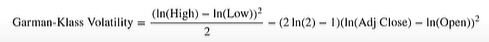

Measures the intraday volatility of an asset

In [8]:
 df['garman_klass_vol'] = ((np.log(df["high"])-np.log(df["low"]))**2)/2 - (2*np.log(2)-1)*((np.log(df["adj close"])- np.log(df["open"]))**2)
 # need to use np.log for logarithm 
 df

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534697   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361622   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.716066   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674232   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644756   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     123.426186  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.581326   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048233  176.869995  178.449997  176.270004  176.580002   

                        volume  garman_klass_vol  
date       ticker                                 
2015-09-29 A         2252400.0         -0.000926  
           AAL       7478800.0         -0.000443  
           AAPL    293461600.0         -0.005441  
           ABBV     12842800.0         -0.051964  
           ABT      12287500.0         -0.008803  
...                        ...               ...  
2023-09-26 YUM       1500600.0          0.000037  
           ZBH       3610500.0          0.000161  
           ZBRA       355400.0          0.000133  
           ZION      1586100.0          0.000292  
           ZTS       1463200.0          0.000072  

[993179 rows x 7 columns]

In [9]:
df["rsi"] = df.groupby(level = 1)['adj close'].transform(lambda x : pandas_ta.rsi(close =x, length = 20))
df
# groupby(level = 1) will access the columns in the date, ticker row ; in our case the adj close
# .transform is to apply lambda function 
# the lambda function itself is to apply the RSI from the pandas_ta package for all x , for length 20

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534697   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361622   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.716066   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674232   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644756   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     123.426186  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.581326   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048233  176.869995  178.449997  176.270004  176.580002   

                        volume  garman_klass_vol        rsi  
date       ticker                                            
2015-09-29 A         2252400.0         -0.000926        NaN  
           AAL       7478800.0         -0.000443        NaN  
           AAPL    293461600.0         -0.005441        NaN  
           ABBV     12842800.0         -0.051964        NaN  
           ABT      12287500.0         -0.008803        NaN  
...                        ...               ...        ...  
2023-09-26 YUM       1500600.0          0.000037  36.057200  
           ZBH       3610500.0          0.000161  31.893253  
           ZBRA       355400.0          0.000133  29.494977  
           ZION      1586100.0          0.000292  46.707775  
           ZTS       1463200.0          0.000072  42.623454  

[993179 rows x 8 columns]

### Calculation of Bband Code explanation

- df: This is presumably a pandas DataFrame, and the code is adding a new column named 'bb_low' to this DataFrame.

- df.groupby(level=1): This part of the code groups the DataFrame df by the second level of its multi-index. If your DataFrame has a multi-index, this line groups the data based on that index level.

- ['adj close']: This extracts the column named 'adj close' from the grouped DataFrame.

- .transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 0]): This is a transformation applied to each group using the transform method. It calculates Bollinger Bands for the log-transformed closing prices (np.log1p(x)) within each group.

- lambda x: This is an anonymous function that takes a group x as input.
- pandas_ta.bbands(close=np.log1p(x), length=20): This computes Bollinger Bands using the pandas_ta library on the log-transformed closing prices within each group.
- .iloc[:, 0]: This selects the first column of the Bollinger Bands DataFrame, presumably the lower band.
- Finally, the result is assigned to a new column in the original DataFrame (df['bb_low']).

In pandas, when you use the `groupby` function, you are essentially splitting the DataFrame into groups based on some criteria, and then you can perform operations on each group independently. The composition of a group depends on the criteria you specify for grouping.

In your code snippet:

```python
df.groupby(level=1)['adj close']
```

Here, `level=1` indicates that you are grouping the DataFrame based on the second level of its multi-index. If your DataFrame has a multi-index (a DataFrame with more than one index level), this line of code is creating groups based on the values at the second level of that multi-index.

For example, let's say your DataFrame looks something like this:

```python
                     adj close
date       symbol             
2022-01-01 AAPL      150.00
           MSFT       75.00
2022-01-02 AAPL      155.00
           MSFT       78.00
```

In this case, using `df.groupby(level=1)['adj close']` would create two groups:

1. Group for 'AAPL':
   ```
   date       symbol
   2022-01-01 AAPL      150.00
   2022-01-02 AAPL      155.00
   ```

2. Group for 'MSFT':
   ```
   date       symbol
   2022-01-01 MSFT       75.00
   2022-01-02 MSFT       78.00
   ```

So, each group comprises rows of the DataFrame where the values at the specified level of the multi-index are the same. The subsequent operations (like calculating Bollinger Bands) are then applied independently to each of these groups.

In [10]:
df['bb_low'] = df.groupby(level =1)['adj close'].transform(lambda x: pandas_ta.bbands(close = np.log1p(x), length =20).iloc[:,0])
# So Basically what happens is, we create groups of adj close price of each stock. then on this group containing the symbol's price we
# Apply the transform required to calculate bband

In [11]:
df['bb_mid'] = df.groupby(level =1)['adj close'].transform(lambda x: pandas_ta.bbands(close = np.log1p(x), length =20).iloc[:,1])
df['bb_high'] = df.groupby(level =1)['adj close'].transform(lambda x: pandas_ta.bbands(close = np.log1p(x), length =20).iloc[:,2])
df

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534697   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361622   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.716066   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674232   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644756   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     123.426186  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.581326   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048233  176.869995  178.449997  176.270004  176.580002   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.000926        NaN       NaN   
           AAL       7478800.0         -0.000443        NaN       NaN   
           AAPL    293461600.0         -0.005441        NaN       NaN   
           ABBV     12842800.0         -0.051964        NaN       NaN   
           ABT      12287500.0         -0.008803        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 YUM       1500600.0          0.000037  36.057200  4.821521   
           ZBH       3610500.0          0.000161  31.893253  4.749948   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZION      1586100.0          0.000292  46.707775  3.527329   
           ZTS       1463200.0          0.000072  42.623454  5.158939   

                     bb_mid   bb_high  
date       ticker                      
2015-09-29 A            NaN       NaN  
           AAL          NaN       NaN  
           AAPL         NaN       NaN  
           ABBV         NaN       NaN  
           ABT          NaN       NaN  
...                     ...       ...  
2023-09-26 YUM     4.851489  4.881456  
           ZBH     4.789615  4.829283  
           ZBRA    5.539167  5.677342  
           ZION    3.582765  3.638202  
           ZTS     5.217753  5.276568  

[993179 rows x 11 columns]

In [12]:
# We need to create a function to calculate the Average True Range(ATR)

def compute_atr(stock_data):
    atr = pandas_ta.atr(high= stock_data['high'],
    low = stock_data['low'],
    close =stock_data['close'],
    length=14)
    return atr.sub(atr.mean()).div(atr.std())
# the pandas_ta.art() method requires High, low, close and period data to be specified
# we dont return the atr value directly, instead we normalise the atr value by subtracting the mean value and dividing by standard dev
# why do we normalise ? Because we want to feed this to an ML model and do clustering later for which data needs to be normalised

df['atr']= df.groupby(level=1, group_keys = False).apply(compute_atr)

In [13]:
df

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534697   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361622   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.716066   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674232   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644756   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     123.426186  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.581326   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048233  176.869995  178.449997  176.270004  176.580002   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.000926        NaN       NaN   
           AAL       7478800.0         -0.000443        NaN       NaN   
           AAPL    293461600.0         -0.005441        NaN       NaN   
           ABBV     12842800.0         -0.051964        NaN       NaN   
           ABT      12287500.0         -0.008803        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 YUM       1500600.0          0.000037  36.057200  4.821521   
           ZBH       3610500.0          0.000161  31.893253  4.749948   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZION      1586100.0          0.000292  46.707775  3.527329   
           ZTS       1463200.0          0.000072  42.623454  5.158939   

                     bb_mid   bb_high       atr  
date       ticker                                
2015-09-29 A            NaN       NaN       NaN  
           AAL          NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN  
           ABT          NaN       NaN       NaN  
...                     ...       ...       ...  
2023-09-26 YUM     4.851489  4.881456  0.142547  
           ZBH     4.789615  4.829283 -0.381708  
           ZBRA    5.539167  5.677342 -0.057389  
           ZION    3.582765  3.638202 -0.161699  
           ZTS     5.217753  5.276568  0.651515  

[993179 rows x 12 columns]

In [14]:
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length =20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())
# we calucluate MACD usoing clos price and the period (length / number of candles) and return the normalised values

df['macd']= df.groupby(level=1, group_keys= False)['adj close'].apply(compute_macd)
df



adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534697   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361622   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.716066   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674232   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644756   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     123.426186  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.581326   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048233  176.869995  178.449997  176.270004  176.580002   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.000926        NaN       NaN   
           AAL       7478800.0         -0.000443        NaN       NaN   
           AAPL    293461600.0         -0.005441        NaN       NaN   
           ABBV     12842800.0         -0.051964        NaN       NaN   
           ABT      12287500.0         -0.008803        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 YUM       1500600.0          0.000037  36.057200  4.821521   
           ZBH       3610500.0          0.000161  31.893253  4.749948   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZION      1586100.0          0.000292  46.707775  3.527329   
           ZTS       1463200.0          0.000072  42.623454  5.158939   

                     bb_mid   bb_high       atr      macd  
date       ticker                                          
2015-09-29 A            NaN       NaN       NaN       NaN  
           AAL          NaN       NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...  
2023-09-26 YUM     4.851489  4.881456  0.142547 -1.363696  
           ZBH     4.789615  4.829283 -0.381708 -0.881067  
           ZBRA    5.539167  5.677342 -0.057389 -1.600791  
           ZION    3.582765  3.638202 -0.161699 -0.164625  
           ZTS     5.217753  5.276568  0.651515 -1.188278  

[993179 rows x 13 columns]

In [15]:
df['dollar_volume'] = (df['adj close']*df['volume'])/1e6
## dollar vol is simple to calc, we div by 1e6 because there is millions of dollars traded everyday, for viewing simplicity
df

adj close       close        high         low        open  \
date       ticker                                                               
2015-09-29 A        31.534697   33.740002   34.060001   33.240002   33.360001   
           AAL      37.361622   39.180000   39.770000   38.790001   39.049999   
           AAPL     24.716066   27.264999   28.377501   26.965000   28.207500   
           ABBV     36.674232   52.790001   54.189999   51.880001   53.099998   
           ABT      33.644756   39.500000   40.150002   39.029999   39.259998   
...                       ...         ...         ...         ...         ...   
2023-09-26 YUM     123.426186  124.010002  124.739998  123.449997  124.239998   
           ZBH     111.992920  112.459999  117.110001  112.419998  116.769997   
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001   
           ZION     33.581326   33.990002   34.700001   33.840000   33.840000   
           ZTS     176.048233  176.869995  178.449997  176.270004  176.580002   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-09-29 A         2252400.0         -0.000926        NaN       NaN   
           AAL       7478800.0         -0.000443        NaN       NaN   
           AAPL    293461600.0         -0.005441        NaN       NaN   
           ABBV     12842800.0         -0.051964        NaN       NaN   
           ABT      12287500.0         -0.008803        NaN       NaN   
...                        ...               ...        ...       ...   
2023-09-26 YUM       1500600.0          0.000037  36.057200  4.821521   
           ZBH       3610500.0          0.000161  31.893253  4.749948   
           ZBRA       355400.0          0.000133  29.494977  5.400991   
           ZION      1586100.0          0.000292  46.707775  3.527329   
           ZTS       1463200.0          0.000072  42.623454  5.158939   

                     bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2015-09-29 A            NaN       NaN       NaN       NaN      71.028751  
           AAL          NaN       NaN       NaN       NaN     279.420098  
           AAPL         NaN       NaN       NaN       NaN    7253.216380  
           ABBV         NaN       NaN       NaN       NaN     470.999833  
           ABT          NaN       NaN       NaN       NaN     413.409943  
...                     ...       ...       ...       ...            ...  
2023-09-26 YUM     4.851489  4.881456  0.142547 -1.363696     185.213334  
           ZBH     4.789615  4.829283 -0.381708 -0.881067     404.350437  
           ZBRA    5.539167  5.677342 -0.057389 -1.600791      79.595386  
           ZION    3.582765  3.638202 -0.161699 -0.164625      53.263340  
           ZTS     5.217753  5.276568  0.651515 -1.188278     257.593775  

[993179 rows x 14 columns]

# 3. Aggregate to monthly level and filter top 150 liquid stocks for each month

- to reduce training time and experiment with features and strategies, we convert the business-daily data to month-end frequency

`df.unstack('ticker')['dollar volume'].resample('M').mean().stack('ticker').to_frame('dollar volume')`
- the above does the following; 
- take the dataframe and unstack it from the tcker level so that you get the every stock along with all its params datewise. so essential it will be a list of dates and the respective prices of a single stock. only once that is all shown, it will go and show the next stock details. 
- it is different from what we are seeing right now because here we are seeing for a given date, all the stocks and their prices; but after unstacking at ticker level we will see for a given stock, all the prices for all the days.
- after the unstack , we resample (by month hence M) the table so as to give us the monthy data. this data point will be the mean, so we are using mean(); end result will be for a given stock, we will see the mean values for all the columns every month now.
- then we restack it using stack('ticker') by ticker level and convert to dataframe. 
- so what this returns is a df just like the one we see above but instead of being ordered date wise, it is monthly.


`last_cols = [c for c in df.columns.unique(0) if c not in ['dollar volume', 'open', 'close', 'high', 'low', 'volume']]`

- this takes out all the columns which we will not use as features; so effectively last_cols only contains those data points which can be used as features. i.e the technical indicators
- furthermore we are not including the dollar volume in the features here because we will be using it separately to aggregate the volume
- later we will also apply the same unstacking-resampling-restacking combination on this to get the data we want

- so finally we will combine the above two processes and concatenate the resulting dfs to get the main df with all the features we want to work with. Additionally we will also drop all the readings with NaN values 
- there are some differenceces when doing the unstack-resmaple-stack part for the last columns; 
- first we dont need to unstack by ticker, we unstack the entire df and then pick out the cols listed in last_cols
- instead of applying the mean() to last_cols we use last() which takes the last reading of the month. ( using mean( will also work but gives different value. I believe we used last() because it is more relevant to consider it for the params we are working with))

In [16]:
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'open', 'high', 'low', 'close', 'volume']]
last_cols
data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'), df.unstack()[last_cols].resample('M').last().stack('ticker')], axis = 1)).dropna()
data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2015-11-30 A          136.213758   39.086578         -0.001902  73.421365   
           AAL        287.915799   39.429932         -0.000966  40.718933   
           AAPL      4034.583589   26.924873         -0.003119  55.537338   
           ABBV       340.716439   40.770763         -0.056745  49.376857   
           ABT        212.708763   38.483479         -0.010572  56.962485   
...                          ...         ...               ...        ...   
2023-09-30 OTIS       155.565476   78.967529          0.000040  33.116240   
           ABNB      1633.500725  132.279999          0.000213  44.494127   
           CEG        197.358104  108.239204          0.000220  55.245464   
           GEHC       212.350630   66.153511          0.000185  40.922326   
           KVUE       684.902631   20.426666          0.000136  35.706317   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2015-11-30 A       3.547568  3.620020  3.692471 -1.033887  0.567157  
           AAL     3.672028  3.749832  3.827636  0.190822 -0.418772  
           AAPL    3.284211  3.327527  3.370842 -0.967900 -0.142790  
           ABBV    3.735768  3.784026  3.832284 -0.526809  0.145677  
           ABT     3.660875  3.682732  3.704588 -1.064842  0.335556  
...                     ...       ...       ...       ...       ...  
2023-09-30 OTIS    4.377807  4.423099  4.468390 -1.028320 -1.534536  
           ABNB    4.857047  4.940924  5.024801 -1.006939 -0.037854  
           CEG     4.655604  4.695779  4.735953 -0.436215  0.366876  
           GEHC    4.155782  4.213319  4.270855 -0.893478 -1.116463  
           KVUE    3.034066  3.109082  3.184098 -0.899746 -1.435621  

[46894 rows x 9 columns]

### Calculate the 5 YR rolling avg dollar volume

In [17]:
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())
# above accesses all the data in the dol_vol col and unstacks it by ticker level; so we get all the data of one stock at a time.
# then on this data first we define the rolling period which is 5 years; since previously we have aggregated at monthly level
# we do 5*12 and then take the mean. (mean will be of the dol_vol for the past 60 months (5*12))
data['dollar_volume_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending = False))
# now we need to rank the stocks based on their dollar_vol; the above does the following
# first takes the previous unstacked data nad groups it by date; i.e on a montly level
# then it ranks the datapoints (stocks) based on the dollar_vol
data = data[data['dollar_volume_rank']<150].drop(['dollar_volume', 'dollar_volume_rank'], axis=1)
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2016-10-31 AAL      39.134327         -0.000176  62.203539  3.604673   
           AAPL     26.281527         -0.002307  49.891158  3.296770   
           ABBV     40.620972         -0.044217  27.477708  3.762525   
           ABT      34.463528         -0.006968  38.008830  3.559438   
           ACN     103.970657         -0.004320  53.823700  4.641169   
...                       ...               ...        ...       ...   
2023-09-30 WMT     161.898697          0.000011  54.722512  5.077929   
           XOM     115.355156          0.000068  59.440186  4.704273   
           MRNA     98.120003          0.000146  38.747314  4.582514   
           UBER     44.270000          0.000441  45.005268  3.806654   
           ABNB    132.279999          0.000213  44.494127  4.857047   

                     bb_mid   bb_high       atr      macd  
date       ticker                                          
2016-10-31 AAL     3.655494  3.706314  0.402199  1.131596  
           AAPL    3.325653  3.354535 -1.038688 -0.195978  
           ABBV    3.816700  3.870876 -0.893132 -0.760593  
           ABT     3.609919  3.660399 -1.035224 -0.650888  
           ACN     4.652807  4.664445 -0.996806 -0.135456  
...                     ...       ...       ...       ...  
2023-09-30 WMT     5.095615  5.113302 -0.196379  0.399459  
           XOM     4.744375  4.784477  0.601335  1.400623  
           MRNA    4.685332  4.788149 -0.529511 -0.376899  
           UBER    3.862227  3.917801 -0.746098 -0.133973  
           ABNB    4.940924  5.024801 -1.006939 -0.037854  

[12516 rows x 8 columns]

# 4. Calculate Monthly Returns for different Time horizons as features

- to capture time series dynamics that reflect. for example, momentum patterns, we need to compute historical returns using .pct_change(lag), which basically returns over various montly periods identified by lags

In [18]:
g = df.xs('AAPL', level=1) # only taking aapl for experimentation
lags =[ 1, 2, 3, 6, 9, 12]
outlier_cutoff = 0.005 # for 99.5 percent
for lag in lags:
    g[f'return_{lag}m'] = (g['adj close'].pct_change(lag)
                            .pipe(lambda x: x.clip(lower = x.quantile(outlier_cutoff),
                            upper = x.quantile(1- outlier_cutoff)))
                            .add(1)
                            .pow(1/lag)
                            .sub(1))

`.pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff), upper=x.quantile(1 - outlier_cutoff))):
`
- The `.pipe()` method is a way to apply a function to the result of the previous operation, which is the percentage change in the 'adj close' column over a lag period.
- The lambda function passed to `.pipe()` uses the `clip()` method on the Series x. The purpose of clip is to limit the values in the Series to a specified range.
- `x.quantile(outlier_cutoff)` Imagine you have a list of numbers (the percentage changes). The .clip() part is like putting a range around those numbers to ignore extreme values.
The extreme values are determined by looking at the list in terms of percentiles. If you split the list into 100 equal parts (percentiles), `x.quantile(outlier_cutoff)` gives you a value below which only a certain percentage of your numbers fall (outlier_cutoff percent), and `x.quantile(1 - outlier_cutoff)` gives you a value above which only a certain percentage of your numbers fall (1 - outlier_cutoff percent).
So, we're saying, "Ignore the really high and really low values, just focus on the middle part."
- `.add(1):` After we've focused on the middle part of our numbers, we add 1 to each of them. This might sound a bit strange, but it's a trick we use in finance. If you have a percentage change, adding 1 turns it into a multiplier. For example, if you had a 5% change, adding 1 makes it 1.05, which means you increased by 5%.
- `.pow(1 / lag)`: Now, we want to think about the whole year. Imagine you had monthly changes. We're raising each number to the power of 1 divided by the number of months (lag). This is a way to "annualize" our changes. It's like asking, "If I kept making this same change every month, what would it look like over a whole year?"
- `.sub(1)`: Finally, after thinking about a whole year, we subtract 1. This undoes the trick we did in step 4. So, if we had multiplied by 1.05 in step 4, now we subtract 1 to get back to the 5% change we started with.

In [19]:
def calculate_returns(df):
    lags = [1, 2, 3, 6, 9, 12]
    outlier_cutoff = 0.005
    for lag in lags:
        df[f'return_{lag}m'] = (df['adj close'].pct_change(lag)
                                .pipe(lambda x: x.clip(lower = x.quantile(outlier_cutoff),
                                upper = x.quantile(1-outlier_cutoff)))
                                .add(1)
                                .pow(1/lag)
                                .sub(1))
    return df
# Applying the procedure on the experimented AAPL case to a function so that it can be used throughout

In [20]:
data = data.groupby(level =1, group_keys = False).apply(calculate_returns).dropna()
# APply the return calculating fucntion to all the stocks in the data dataframe (by grouping at level 1). Following that we drop all rows which have an NaN value
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2017-10-31 AAL      45.534168         -0.000363  41.051782  3.849110   
           AAPL     39.818512         -0.000945  69.196741  3.597289   
           ABBV     68.121460         -0.031904  55.247895  4.205859   
           ABT      48.733871         -0.004755  53.844882  3.897414   
           ACN     129.900726         -0.003628  69.365025  4.806508   
...                       ...               ...        ...       ...   
2023-09-30 WMT     161.898697          0.000011  54.722512  5.077929   
           XOM     115.355156          0.000068  59.440186  4.704273   
           MRNA     98.120003          0.000146  38.747314  4.582514   
           UBER     44.270000          0.000441  45.005268  3.806654   
           ABNB    132.279999          0.000213  44.494127  4.857047   

                     bb_mid   bb_high       atr      macd  return_1m  \
date       ticker                                                      
2017-10-31 AAL     3.921750  3.994389  1.011062 -0.018698  -0.014108   
           AAPL    3.644164  3.691040 -0.906642 -0.039275   0.096808   
           ABBV    4.252226  4.298592  0.375557  0.473815   0.022728   
           ABT     3.920986  3.944558 -1.040044  0.276132   0.021276   
           ACN     4.846188  4.885869 -0.986514  0.352342   0.064180   
...                     ...       ...       ...       ...        ...   
2023-09-30 WMT     5.095615  5.113302 -0.196379  0.399459  -0.000676   
           XOM     4.744375  4.784477  0.601335  1.400623   0.046947   
           MRNA    4.685332  4.788149 -0.529511 -0.376899  -0.132219   
           UBER    3.862227  3.917801 -0.746098 -0.133973  -0.062672   
           ABNB    4.940924  5.024801 -1.006939 -0.037854   0.005549   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2017-10-31 AAL      0.022981  -0.023860   0.016495   0.007008    0.012702  
           AAPL     0.015250   0.044955   0.028875   0.038941    0.035228  
           ABBV     0.098590   0.091379   0.056495   0.047273    0.044026  
           ABT      0.034308   0.034801   0.038672   0.031320    0.029294  
           ACN      0.048454   0.037202   0.028692   0.027398    0.018728  
...                      ...        ...        ...        ...         ...  
2023-09-30 WMT      0.010014   0.012354   0.017574   0.016553    0.020256  
           XOM      0.046139   0.030496   0.012838   0.008747    0.027037  
           MRNA    -0.086803  -0.068763  -0.071952  -0.064976   -0.015431  
           UBER    -0.053920   0.008422   0.057244   0.066838    0.043691  
           ABNB    -0.067704   0.010603   0.010289   0.049124    0.019401  

[10335 rows x 14 columns]

# 5. Fama-French Factors and Calculate ROlling Factor Betas

- Use Fama-French Data to estimate the exposure of assets to common risk factors using Linear Regression
- 5 Fama-French Factors : Market Risk, Size, Vlaue, Operating Profitability, Investment. 
- these 5 have been shown empirically to explain asset returns and are commonly used to asses risk return profilkes of portfolios. 
- therefore we are including these past factor exposures as financial features in models
- historical factor returns using pd_datareader
- estimate historical exposures using RollingOLS rolling linear regression 

In [21]:
# we use the [0] to access only the monthhly returns part of the dictionary. otherwise there will be two montly and annual
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='2010')[0].drop('RF', axis=1)
factor_data

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2010-01,-3.36,0.34,0.43,-1.27,0.46
2010-02,3.40,1.51,3.23,-0.27,1.43
2010-03,6.31,1.85,2.21,-0.65,1.69
2010-04,2.00,4.98,2.89,0.69,1.72
2010-05,-7.89,0.04,-2.44,1.30,-0.21
...,...,...,...,...,...
2023-08,-2.39,-3.65,-1.06,3.43,-2.37
2023-09,-5.24,-1.80,1.52,1.86,-0.83
2023-10,-3.19,-4.04,0.19,2.46,-0.66


In [22]:
factor_data.index = factor_data.index.to_timestamp()
factor_data
# note here that the dates are beginning of the month while our data df is using end of month

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2010-01-01,-3.36,0.34,0.43,-1.27,0.46
2010-02-01,3.40,1.51,3.23,-0.27,1.43
2010-03-01,6.31,1.85,2.21,-0.65,1.69
2010-04-01,2.00,4.98,2.89,0.69,1.72
2010-05-01,-7.89,0.04,-2.44,1.30,-0.21
...,...,...,...,...,...
2023-08-01,-2.39,-3.65,-1.06,3.43,-2.37
2023-09-01,-5.24,-1.80,1.52,1.86,-0.83
2023-10-01,-3.19,-4.04,0.19,2.46,-0.66


this converts the data to the end of the month. resample makes it montly and .last() takes the last date of the month. THen we divide by 100 because we need it in percentage format


In [23]:
factor_data=factor_data.resample('M').last().div(100)
factor_data.index.name ='date'
factor_data

,Mkt-RF,SMB,HML,RMW,CMA
date,,,,,
2010-01-31,-0.0336,0.0034,0.0043,-0.0127,0.0046
2010-02-28,0.0340,0.0151,0.0323,-0.0027,0.0143
2010-03-31,0.0631,0.0185,0.0221,-0.0065,0.0169
2010-04-30,0.0200,0.0498,0.0289,0.0069,0.0172
2010-05-31,-0.0789,0.0004,-0.0244,0.0130,-0.0021
...,...,...,...,...,...
2023-08-31,-0.0239,-0.0365,-0.0106,0.0343,-0.0237
2023-09-30,-0.0524,-0.0180,0.0152,0.0186,-0.0083
2023-10-31,-0.0319,-0.0404,0.0019,0.0246,-0.0066


Now we join the factor data to the 1month returns so that we can calculate the beta by regreessing it and 
if the factor is predictive we have it at the beginning of the month and regress it with the end of the month

In Detail Explanation of Above Objective and why we are doing it. Point 4 and 5 Important

1. **Factor Data (Fama-French):**
   - Fama-French factors are variables that researchers believe influence stock returns. The common factors include:
     - Market Return: Reflects the overall market performance.
     - Size (SMB): Measures the effect of a company's size on its return.
     - Value (HML): Captures the impact of a company's valuation.
     - Profitability (RMW): Represents the effect of a company's profitability.
     - Investment (CMA): Reflects the impact of a company's investment decisions.

2. **1-Month Returns:**
   - For each stock, you have the percentage change in its stock price over a one-month period. This is a simple measure of how the stock performed during that specific month.

3. **Joining Factor Data to 1-Month Returns:**
   - The factor data (multiple factors for each stock) is combined with the 1-month returns data. This is typically done using a common identifier, such as the stock ticker symbol.
   - The result is a dataset where each row represents a specific stock, and the columns include the Fama-French factor values and the corresponding 1-month return for that stock.

4. **Calculating Beta through Regression:**
   - The regression model is used to understand how a stock's return is influenced by changes in the Fama-French factors. The regression equation is typically written as:
   
     - Stock Return = beta_0 + beta_1 * Market Factor + beta_2 * Size Factor + beta_3 * Value Factor + beta_4 * Profitability Factor + beta_5 * Investment Factor + epsilon


     - \(\beta_1, \beta_2, \beta_3, \beta_4, \beta_5\) are the beta coefficients that indicate the sensitivity of the stock's return to each respective factor.
     - \(\epsilon\) is the error term, representing unexplained variation in the stock's return.

   - Running this regression for each stock produces beta values that quantify how much a stock's return tends to move concerning changes in the Fama-French factors.

5. **Predictive Power of Factors:**
   - If the factor data is considered predictive, having it at the beginning of the month allows for an analysis of how well it predicts the stock's return for that month.
   - You regress the 1-month return on the Fama-French factors, and the resulting beta coefficients help quantify the impact of each factor on the stock's return.

In summary, this process involves combining Fama-French factor data with individual stock returns, running regressions to calculate beta coefficients, and assessing the predictive power of these factors in explaining stock returns for a given month.

In [24]:
factor_data = factor_data.join(data['return_1m']).sort_index()
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2017-10-31 AAL     0.0225 -0.0194  0.0020  0.0093 -0.0325  -0.014108
           AAPL    0.0225 -0.0194  0.0020  0.0093 -0.0325   0.096808
           ABBV    0.0225 -0.0194  0.0020  0.0093 -0.0325   0.022728
           ABT     0.0225 -0.0194  0.0020  0.0093 -0.0325   0.021276
           ACN     0.0225 -0.0194  0.0020  0.0093 -0.0325   0.064180
...                   ...     ...     ...     ...     ...        ...
2023-09-30 VRTX   -0.0524 -0.0180  0.0152  0.0186 -0.0083   0.009617
           VZ     -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.056890
           WFC    -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.015500
           WMT    -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.000676
           XOM    -0.0524 -0.0180  0.0152  0.0186 -0.0083   0.046947

[10335 rows x 6 columns]

In [25]:
#cross-check
# factor_data.xs('AAPL', level=1).head()


Filter stocks with less than 10 months data. 
Because using rolling window for regression of 2yrs ~ 24 months. so we need only stocks which have enough data

In [26]:
factor_data.groupby(level=1).size()

ticker
AAL     72
AAPL    72
ABBV    72
ABNB    10
ABT     72
        ..
WFC     72
WMT     72
WYNN    69
XOM     72
YUM      2
Length: 176, dtype: int64

In [27]:
observations = factor_data.groupby(level=1).size()
valid_stocks = observations[observations >=10]

In [28]:
valid_stocks

ticker
AAL     72
AAPL    72
ABBV    72
ABNB    10
ABT     72
        ..
WDC     56
WFC     72
WMT     72
WYNN    69
XOM     72
Length: 168, dtype: int64

In [29]:
factor_data.index.get_level_values('ticker')

Index(['AAL', 'AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'AMAT', 'AMGN',
       'AMZN',
       ...
       'UNP', 'UPS', 'USB', 'V', 'VLO', 'VRTX', 'VZ', 'WFC', 'WMT', 'XOM'],
      dtype='object', name='ticker', length=10335)

In [30]:
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2017-10-31 AAL     0.0225 -0.0194  0.0020  0.0093 -0.0325  -0.014108
           AAPL    0.0225 -0.0194  0.0020  0.0093 -0.0325   0.096808
           ABBV    0.0225 -0.0194  0.0020  0.0093 -0.0325   0.022728
           ABT     0.0225 -0.0194  0.0020  0.0093 -0.0325   0.021276
           ACN     0.0225 -0.0194  0.0020  0.0093 -0.0325   0.064180
...                   ...     ...     ...     ...     ...        ...
2023-09-30 VRTX   -0.0524 -0.0180  0.0152  0.0186 -0.0083   0.009617
           VZ     -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.056890
           WFC    -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.015500
           WMT    -0.0524 -0.0180  0.0152  0.0186 -0.0083  -0.000676
           XOM    -0.0524 -0.0180  0.0152  0.0186 -0.0083   0.046947

[10297 rows x 6 columns]

- Calculate Rolling Factor Betas

`factor_data.groupby(level=1, group_keys=False):`

The groupby method is used to group the data in factor_data by a specific level (level 1 in this case).
group_keys=False ensures that the resulting DataFrame doesn't have the grouping key as part of the index.
`.apply(lambda x: ...):`

For each group of data (each stock), the apply method is used to perform operations specified in the lambda function.
`RollingOLS(...):`

RollingOLS is a rolling ordinary least squares regression model. It calculates beta coefficients for each rolling window of the data.
endog is the dependent variable (in this case, 'return_1m').
exog is the matrix of independent variables, including a constant term (intercept) added using sm.add_constant.
window specifies the size of the rolling window (maximum 24 or the number of observations if less).
min_nobs is set to ensure a minimum number of observations for the regression.
`.fit(params_only=True):`

The fit method is applied to perform the regression.
params_only=True ensures that only the estimated parameters (coefficients) are returned, not the full regression results.
`.params:`

After fitting the model, .params is used to extract the estimated parameters, which include the beta coefficients for each factor.
`.drop('const', axis=1):`

The constant term (intercept) is dropped from the results, as it's not needed for beta calculation.
The result (betas):

The final result is a DataFrame with beta coefficients for each Fama-French factor for each stock, calculated using a rolling window approach.

In [31]:
betas = (factor_data.groupby(level=1,
                    group_keys =False)
                    .apply(lambda x: RollingOLS(endog =x['return_1m'],
                    exog = sm.add_constant(x.drop('return_1m', axis =1)),
                    window = min(24, x.shape[0]),
                    min_nobs = len(x.columns)+1)
                    
        .fit(params_only = True)
        .params
        .drop('const', axis=1)))
betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2017-10-31 AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2023-09-30 VRTX    0.456467 -0.445783 -0.312765 -0.079230  0.800476
           VZ      0.332655 -0.165646  0.267344  0.310366  0.106902
           WFC     1.121746  0.300520  2.061532 -0.439490 -1.517557
           WMT     0.700556 -0.315599 -0.413433 -0.142905  0.508471
           XOM     0.983510 -1.093759  1.756777 -0.640865 -0.368456

[10297 rows x 5 columns]

- now join to the data df so as to get the full feature set
- problem is the time alignment
- rolling factor betas are based on the start of the month but our returns data is the end of the month
- so we will need to shift the betas by a month so that they align properly.

In [32]:
data = data.join(betas.groupby('ticker').shift())
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2017-10-31 AAL      45.534168         -0.000363  41.051782  3.849110   
           AAPL     39.818512         -0.000945  69.196741  3.597289   
           ABBV     68.121460         -0.031904  55.247895  4.205859   
           ABT      48.733871         -0.004755  53.844882  3.897414   
           ACN     129.900726         -0.003628  69.365025  4.806508   
...                       ...               ...        ...       ...   
2023-09-30 WMT     161.898697          0.000011  54.722512  5.077929   
           XOM     115.355156          0.000068  59.440186  4.704273   
           MRNA     98.120003          0.000146  38.747314  4.582514   
           UBER     44.270000          0.000441  45.005268  3.806654   
           ABNB    132.279999          0.000213  44.494127  4.857047   

                     bb_mid   bb_high       atr      macd  return_1m  \
date       ticker                                                      
2017-10-31 AAL     3.921750  3.994389  1.011062 -0.018698  -0.014108   
           AAPL    3.644164  3.691040 -0.906642 -0.039275   0.096808   
           ABBV    4.252226  4.298592  0.375557  0.473815   0.022728   
           ABT     3.920986  3.944558 -1.040044  0.276132   0.021276   
           ACN     4.846188  4.885869 -0.986514  0.352342   0.064180   
...                     ...       ...       ...       ...        ...   
2023-09-30 WMT     5.095615  5.113302 -0.196379  0.399459  -0.000676   
           XOM     4.744375  4.784477  0.601335  1.400623   0.046947   
           MRNA    4.685332  4.788149 -0.529511 -0.376899  -0.132219   
           UBER    3.862227  3.917801 -0.746098 -0.133973  -0.062672   
           ABNB    4.940924  5.024801 -1.006939 -0.037854   0.005549   

                   return_2m  return_3m  return_6m  return_9m  return_12m  \
date       ticker                                                           
2017-10-31 AAL      0.022981  -0.023860   0.016495   0.007008    0.012702   
           AAPL     0.015250   0.044955   0.028875   0.038941    0.035228   
           ABBV     0.098590   0.091379   0.056495   0.047273    0.044026   
           ABT      0.034308   0.034801   0.038672   0.031320    0.029294   
           ACN      0.048454   0.037202   0.028692   0.027398    0.018728   
...                      ...        ...        ...        ...         ...   
2023-09-30 WMT      0.010014   0.012354   0.017574   0.016553    0.020256   
           XOM      0.046139   0.030496   0.012838   0.008747    0.027037   
           MRNA    -0.086803  -0.068763  -0.071952  -0.064976   -0.015431   
           UBER    -0.053920   0.008422   0.057244   0.066838    0.043691   
           ABNB    -0.067704   0.010603   0.010289   0.049124    0.019401   

                     Mkt-RF       SMB       HML       RMW       CMA  
date       ticker                                                    
2017-10-31 AAL          NaN       NaN       NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN       NaN  
           ACN          NaN       NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...       ...  
2023-09-30 WMT     0.740055 -0.261889 -0.522677 -0.126425  0.642627  
           XOM     1.005968 -1.051370  1.707834 -0.675678 -0.284026  
           MRNA    1.155154  0.762525 -1.165677  0.590306  0.993548  
           UBER    1.078922  1.162540 -0.257003 -1.482231 -0.450323  
           ABNB         NaN       NaN       NaN       NaN       NaN  

[10335 rows x 19 columns]

In [33]:
data.loc

- Imputation of missing data

In [34]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2017-10-31 AAL      45.534168         -0.000363  41.051782  3.849110   
           AAPL     39.818512         -0.000945  69.196741  3.597289   
           ABBV     68.121460         -0.031904  55.247895  4.205859   
           ABT      48.733871         -0.004755  53.844882  3.897414   
           ACN     129.900726         -0.003628  69.365025  4.806508   
...                       ...               ...        ...       ...   
2023-09-30 WMT     161.898697          0.000011  54.722512  5.077929   
           XOM     115.355156          0.000068  59.440186  4.704273   
           MRNA     98.120003          0.000146  38.747314  4.582514   
           UBER     44.270000          0.000441  45.005268  3.806654   
           ABNB    132.279999          0.000213  44.494127  4.857047   

                     bb_mid   bb_high       atr      macd  return_1m  \
date       ticker                                                      
2017-10-31 AAL     3.921750  3.994389  1.011062 -0.018698  -0.014108   
           AAPL    3.644164  3.691040 -0.906642 -0.039275   0.096808   
           ABBV    4.252226  4.298592  0.375557  0.473815   0.022728   
           ABT     3.920986  3.944558 -1.040044  0.276132   0.021276   
           ACN     4.846188  4.885869 -0.986514  0.352342   0.064180   
...                     ...       ...       ...       ...        ...   
2023-09-30 WMT     5.095615  5.113302 -0.196379  0.399459  -0.000676   
           XOM     4.744375  4.784477  0.601335  1.400623   0.046947   
           MRNA    4.685332  4.788149 -0.529511 -0.376899  -0.132219   
           UBER    3.862227  3.917801 -0.746098 -0.133973  -0.062672   
           ABNB    4.940924  5.024801 -1.006939 -0.037854   0.005549   

                   return_2m  return_3m  return_6m  return_9m  return_12m  \
date       ticker                                                           
2017-10-31 AAL      0.022981  -0.023860   0.016495   0.007008    0.012702   
           AAPL     0.015250   0.044955   0.028875   0.038941    0.035228   
           ABBV     0.098590   0.091379   0.056495   0.047273    0.044026   
           ABT      0.034308   0.034801   0.038672   0.031320    0.029294   
           ACN      0.048454   0.037202   0.028692   0.027398    0.018728   
...                      ...        ...        ...        ...         ...   
2023-09-30 WMT      0.010014   0.012354   0.017574   0.016553    0.020256   
           XOM      0.046139   0.030496   0.012838   0.008747    0.027037   
           MRNA    -0.086803  -0.068763  -0.071952  -0.064976   -0.015431   
           UBER    -0.053920   0.008422   0.057244   0.066838    0.043691   
           ABNB    -0.067704   0.010603   0.010289   0.049124    0.019401   

                     Mkt-RF       SMB       HML       RMW       CMA  
date       ticker                                                    
2017-10-31 AAL     1.265664  1.314317  0.601340  0.458860  0.563294  
           AAPL    1.275750 -0.271695 -0.591145  0.647780  0.458079  
           ABBV    0.494521  0.362282 -0.033101  0.241982  0.164918  
           ABT     0.828092 -0.199021 -0.529385  0.252406  0.970211  
           ACN     1.199048 -0.166701 -0.328214  0.267790  0.168885  
...                     ...       ...       ...       ...       ...  
2023-09-30 WMT     0.740055 -0.261889 -0.522677 -0.126425  0.642627  
           XOM     1.005968 -1.051370  1.707834 -0.675678 -0.284026  
           MRNA    1.155154  0.762525 -1.165677  0.590306  0.993548  
           UBER    1.078922  1.162540 -0.257003 -1.482231 -0.450323  
           ABNB         NaN       NaN       NaN       NaN       NaN  

[10335 rows x 19 columns]

In [35]:
data = data.drop('adj close', axis =1)
data =data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10060 entries, (Timestamp('2017-10-31 00:00:00'), 'AAL') to (Timestamp('2023-09-30 00:00:00'), 'UBER')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   garman_klass_vol  10060 non-null  float64
 1   rsi               10060 non-null  float64
 2   bb_low            10060 non-null  float64
 3   bb_mid            10060 non-null  float64
 4   bb_high           10060 non-null  float64
 5   atr               10060 non-null  float64
 6   macd              10060 non-null  float64
 7   return_1m         10060 non-null  float64
 8   return_2m         10060 non-null  float64
 9   return_3m         10060 non-null  float64
 10  return_6m         10060 non-null  float64
 11  return_9m         10060 non-null  float64
 12  return_12m        10060 non-null  float64
 13  Mkt-RF            10060 non-null  float64
 14  SMB               10060 non-null  float64
 15  HML       

In [36]:
data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2017-10-31 AAL            -0.000363  41.051782  3.849110  3.921750  3.994389   
           AAPL           -0.000945  69.196741  3.597289  3.644164  3.691040   
           ABBV           -0.031904  55.247895  4.205859  4.252226  4.298592   
           ABT            -0.004755  53.844882  3.897414  3.920986  3.944558   
           ACN            -0.003628  69.365025  4.806508  4.846188  4.885869   
...                             ...        ...       ...       ...       ...   
2023-09-30 WFC             0.000016  40.920278  3.702645  3.743015  3.783384   
           WMT             0.000011  54.722512  5.077929  5.095615  5.113302   
           XOM             0.000068  59.440186  4.704273  4.744375  4.784477   
           MRNA            0.000146  38.747314  4.582514  4.685332  4.788149   
           UBER            0.000441  45.005268  3.806654  3.862227  3.917801   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2017-10-31 AAL     1.011062 -0.018698  -0.014108   0.022981  -0.023860   
           AAPL   -0.906642 -0.039275   0.096808   0.015250   0.044955   
           ABBV    0.375557  0.473815   0.022728   0.098590   0.091379   
           ABT    -1.040044  0.276132   0.021276   0.034308   0.034801   
           ACN    -0.986514  0.352342   0.064180   0.048454   0.037202   
...                     ...       ...        ...        ...        ...   
2023-09-30 WFC    -0.558742 -0.282325  -0.015500  -0.057917  -0.013554   
           WMT    -0.196379  0.399459  -0.000676   0.010014   0.012354   
           XOM     0.601335  1.400623   0.046947   0.046139   0.030496   
           MRNA   -0.529511 -0.376899  -0.132219  -0.086803  -0.068763   
           UBER   -0.746098 -0.133973  -0.062672  -0.053920   0.008422   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2017-10-31 AAL      0.016495   0.007008    0.012702  1.265664  1.314317   
           AAPL     0.028875   0.038941    0.035228  1.275750 -0.271695   
           ABBV     0.056495   0.047273    0.044026  0.494521  0.362282   
           ABT      0.038672   0.031320    0.029294  0.828092 -0.199021   
           ACN      0.028692   0.027398    0.018728  1.199048 -0.166701   
...                      ...        ...         ...       ...       ...   
2023-09-30 WFC      0.016712   0.000702    0.003255  1.137640  0.314482   
           WMT      0.017574   0.016553    0.020256  0.740055 -0.261889   
           XOM      0.012838   0.008747    0.027037  1.005968 -1.051370   
           MRNA    -0.071952  -0.064976   -0.015431  1.155154  0.762525   
           UBER     0.057244   0.066838    0.043691  1.078922  1.162540   

                        HML       RMW       CMA  
date       ticker                                
2017-10-31 AAL     0.601340  0.458860  0.563294  
           AAPL   -0.591145  0.647780  0.458079  
           ABBV   -0.033101  0.241982  0.164918  
           ABT    -0.529385  0.252406  0.970211  
           ACN    -0.328214  0.267790  0.168885  
...                     ...       ...       ...  
2023-09-30 WFC     2.009073 -0.404338 -1.468839  
           WMT    -0.522677 -0.126425  0.642627  
           XOM     1.707834 -0.675678 -0.284026  
           MRNA   -1.165677  0.590306  0.993548  
           UBER   -0.257003 -1.482231 -0.450323  

[10060 rows x 18 columns]

# Data is ready. ML Now

### We need to decide which ML model and approach to use for predictions
further Ml can be used for a variety of things
- Prediction of prices
- At the end of each month decide which stocks to keep in portfolio for the next month
- Generate Buy and Sell signals for the portfolio
- Make weights of componenets of the portfolio

We will be doing only Long Portfolio

# 6. For Each month, fit a K.Means Clustering Algorithm to group similar assets based on their features

## K-Means Clustering
- May have to initialize predefined centroids or decide on the ideal number of clusters based on your own research
- We will use 4
- For viz we will use k-means++ initialization but later pre-define our centroids for each cluster

In [37]:
# from sklearn.cluster import KMeans
# # fit kmeans model to each month and assign a cluster to each stock

# def get_clusters(df):
#     df['cluster']= KMeans(n_clusters = 4, random_state=0, init = 'random').fit(df).labels_
    
#     return df

# data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)
# # this takes the data, groups it by month, then assigns a cluster to each stock
# data

This part here is manual visualization of KMeans without specific centroids.

Here we are using the ATR and RSI ( columns 5 and 1) as axes. 

In [38]:
# def plot_clusters(data):

#     cluster_0 = data[data['cluster']==0]
#     cluster_1 = data[data['cluster']==1]
#     cluster_2 = data[data['cluster']==2]
#     cluster_3 = data[data['cluster']==3]

#     plt.scatter(cluster_0.iloc[:,5] , cluster_0.iloc[:,1] , color = 'red', label='cluster 0')
#     plt.scatter(cluster_1.iloc[:,5] , cluster_1.iloc[:,1] , color = 'green', label='cluster 1')
#     plt.scatter(cluster_2.iloc[:,5] , cluster_2.iloc[:,1] , color = 'blue', label='cluster 2')
#     plt.scatter(cluster_3.iloc[:,5] , cluster_3.iloc[:,1] , color = 'black', label='cluster 3')
    
#     plt.legend()
#     plt.show()
#     return

In [39]:
# plt.style.use('ggplot')

# for i in data.index.get_level_values('date').unique().tolist():
    
#     g = data.xs(i, level=0)
    
#     plt.title(f'Date {i}')
    
#     plot_clusters(g)

### Applying Pre-Defined Centroids

The reasoning here is that we want the centroids to be around 70, 55, 45 and 30 value of the RSI

In [40]:
target_rsi_values = [30, 45, 55, 70]

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids[:, 6] = target_rsi_values

initial_centroids

array([[ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [41]:
from sklearn.cluster import KMeans

# data = data.drop('cluster', axis=1)

def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4,
                           random_state=0,
                           init=initial_centroids).fit(df).labels_
    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2017-10-31 AAL            -0.000363  41.051782  3.849110  3.921750  3.994389   
           AAPL           -0.000945  69.196741  3.597289  3.644164  3.691040   
           ABBV           -0.031904  55.247895  4.205859  4.252226  4.298592   
           ABT            -0.004755  53.844882  3.897414  3.920986  3.944558   
           ACN            -0.003628  69.365025  4.806508  4.846188  4.885869   
...                             ...        ...       ...       ...       ...   
2023-09-30 WFC             0.000016  40.920278  3.702645  3.743015  3.783384   
           WMT             0.000011  54.722512  5.077929  5.095615  5.113302   
           XOM             0.000068  59.440186  4.704273  4.744375  4.784477   
           MRNA            0.000146  38.747314  4.582514  4.685332  4.788149   
           UBER            0.000441  45.005268  3.806654  3.862227  3.917801   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2017-10-31 AAL     1.011062 -0.018698  -0.014108   0.022981  -0.023860   
           AAPL   -0.906642 -0.039275   0.096808   0.015250   0.044955   
           ABBV    0.375557  0.473815   0.022728   0.098590   0.091379   
           ABT    -1.040044  0.276132   0.021276   0.034308   0.034801   
           ACN    -0.986514  0.352342   0.064180   0.048454   0.037202   
...                     ...       ...        ...        ...        ...   
2023-09-30 WFC    -0.558742 -0.282325  -0.015500  -0.057917  -0.013554   
           WMT    -0.196379  0.399459  -0.000676   0.010014   0.012354   
           XOM     0.601335  1.400623   0.046947   0.046139   0.030496   
           MRNA   -0.529511 -0.376899  -0.132219  -0.086803  -0.068763   
           UBER   -0.746098 -0.133973  -0.062672  -0.053920   0.008422   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2017-10-31 AAL      0.016495   0.007008    0.012702  1.265664  1.314317   
           AAPL     0.028875   0.038941    0.035228  1.275750 -0.271695   
           ABBV     0.056495   0.047273    0.044026  0.494521  0.362282   
           ABT      0.038672   0.031320    0.029294  0.828092 -0.199021   
           ACN      0.028692   0.027398    0.018728  1.199048 -0.166701   
...                      ...        ...         ...       ...       ...   
2023-09-30 WFC      0.016712   0.000702    0.003255  1.137640  0.314482   
           WMT      0.017574   0.016553    0.020256  0.740055 -0.261889   
           XOM      0.012838   0.008747    0.027037  1.005968 -1.051370   
           MRNA    -0.071952  -0.064976   -0.015431  1.155154  0.762525   
           UBER     0.057244   0.066838    0.043691  1.078922  1.162540   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2017-10-31 AAL     0.601340  0.458860  0.563294        0  
           AAPL   -0.591145  0.647780  0.458079        2  
           ABBV   -0.033101  0.241982  0.164918        3  
           ABT    -0.529385  0.252406  0.970211        3  
           ACN    -0.328214  0.267790  0.168885        2  
...                     ...       ...       ...      ...  
2023-09-30 WFC     2.009073 -0.404338 -1.468839        3  
           WMT    -0.522677 -0.126425  0.642627        1  
           XOM     1.707834 -0.675678 -0.284026        1  
           MRNA   -1.165677  0.590306  0.993548        3  
           UBER   -0.257003 -1.482231 -0.450323        2  

[10060 rows x 19 columns]

In [42]:

def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:,5] , cluster_0.iloc[:,1] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,5] , cluster_1.iloc[:,1] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,5] , cluster_2.iloc[:,1] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,5] , cluster_3.iloc[:,1] , color = 'black', label='cluster 3')
    
    plt.legend()
    plt.show()
    return

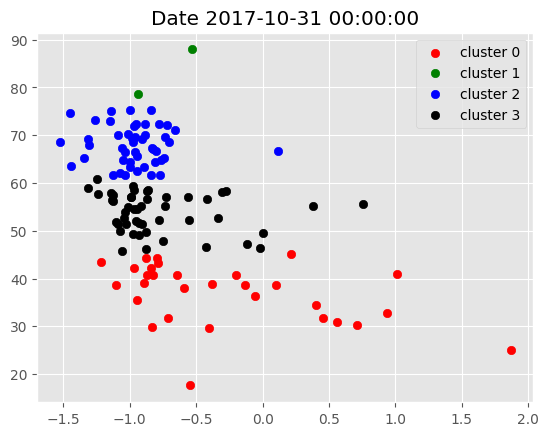

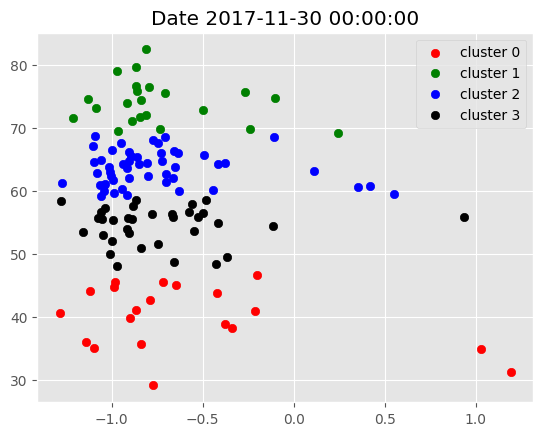

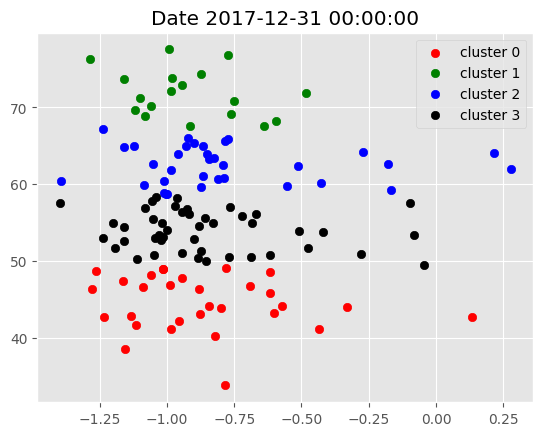

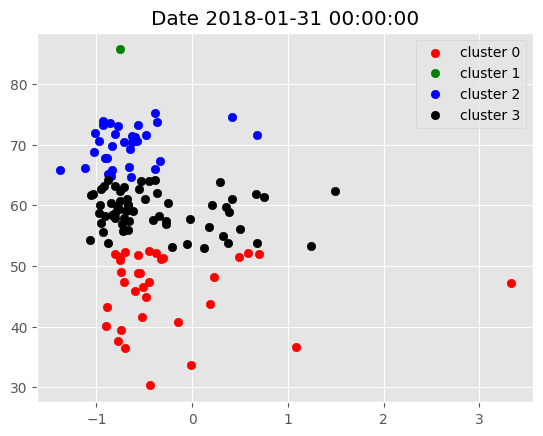

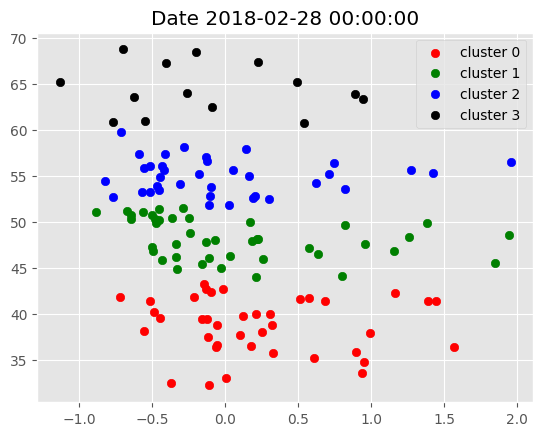

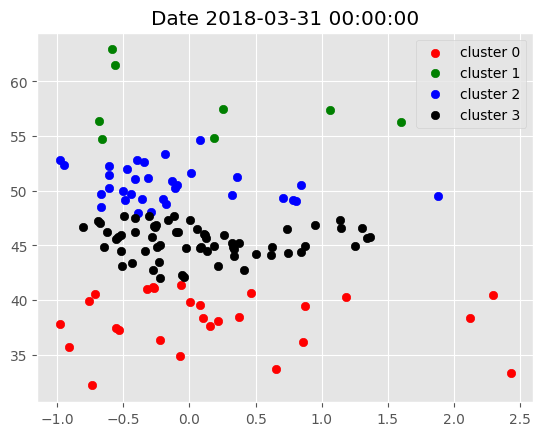

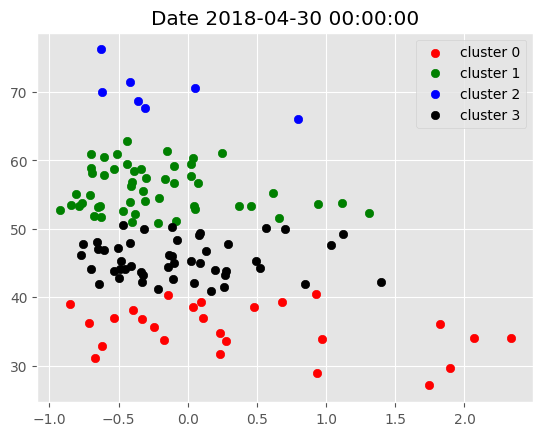

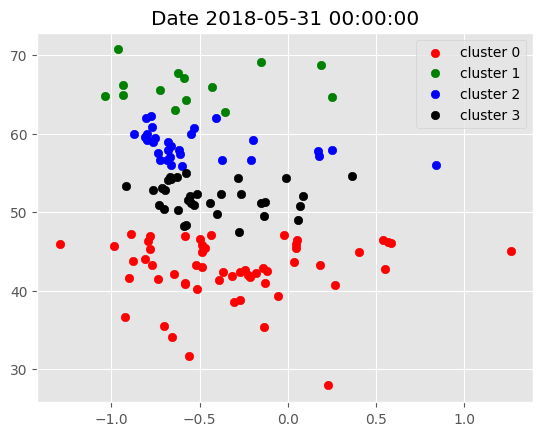

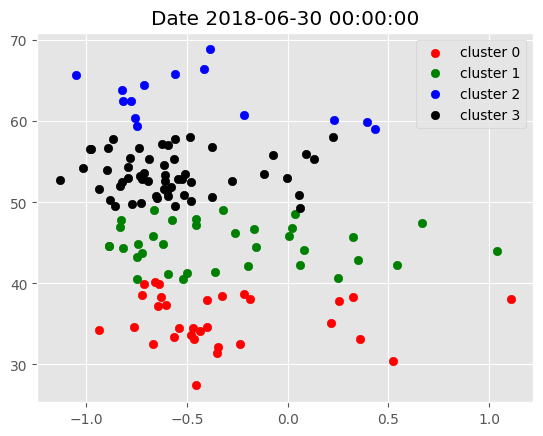

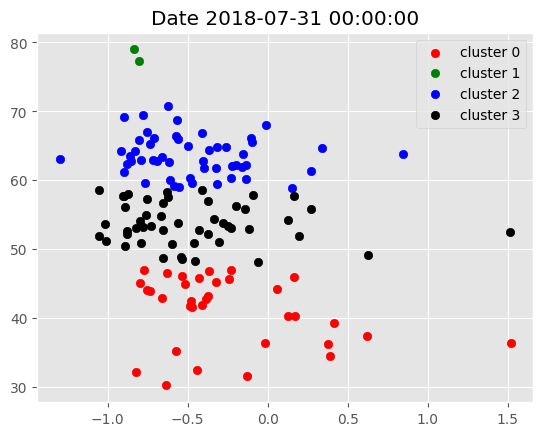

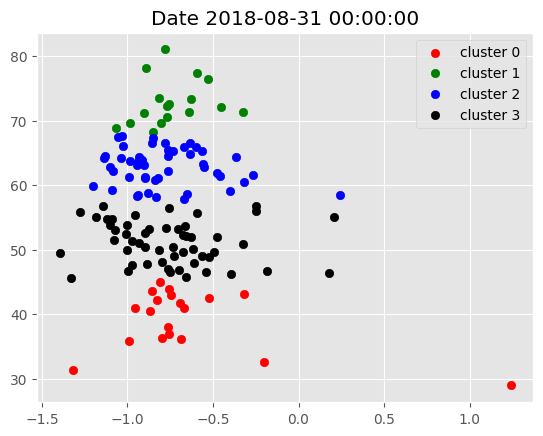

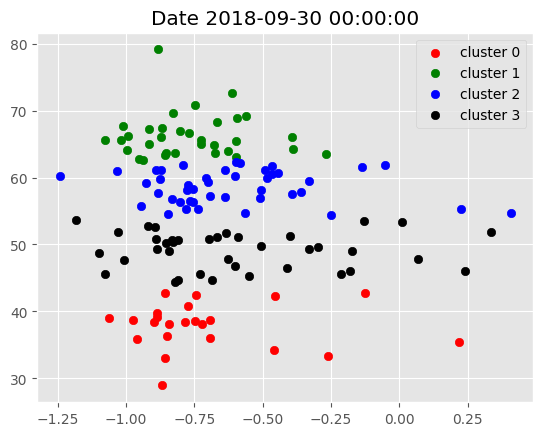

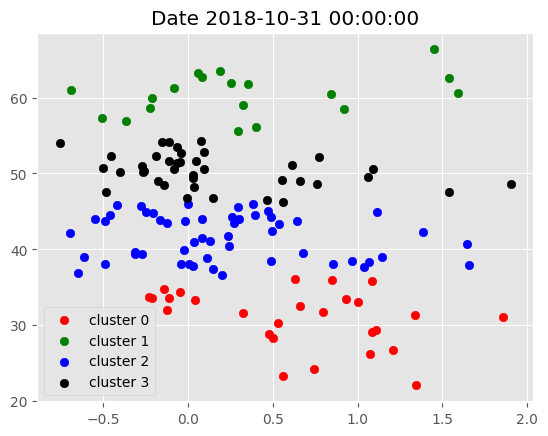

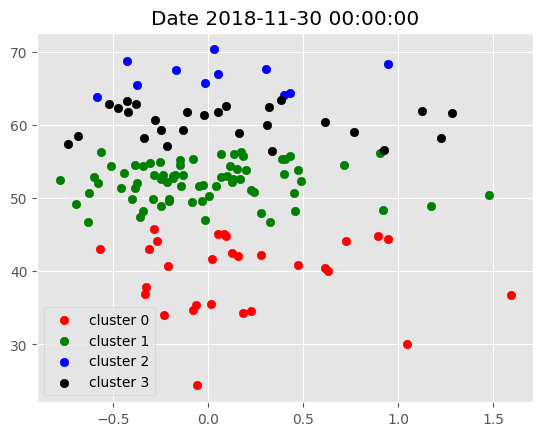

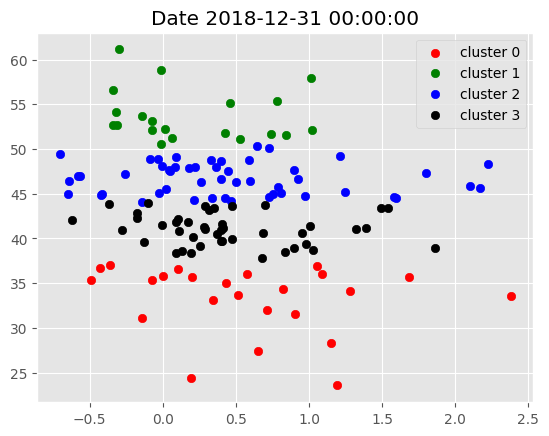

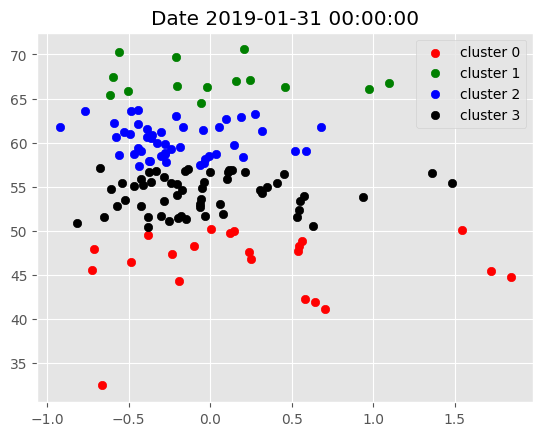

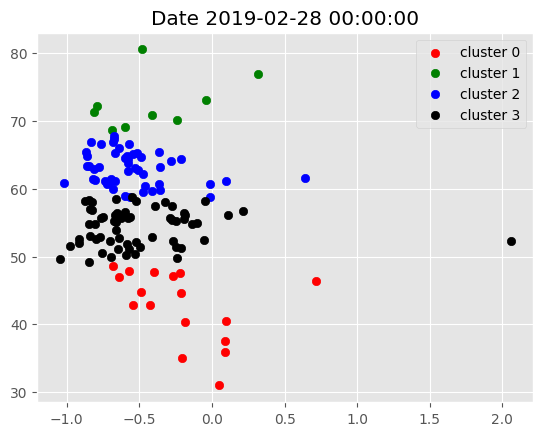

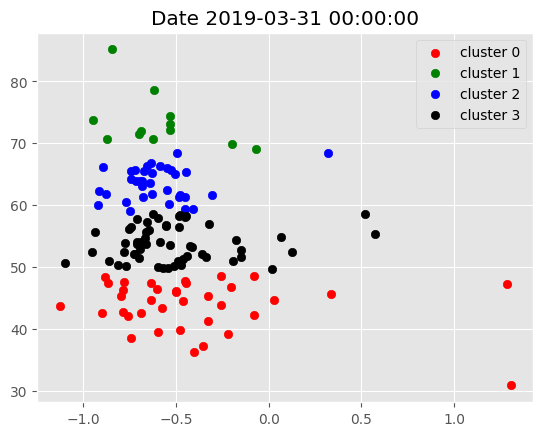

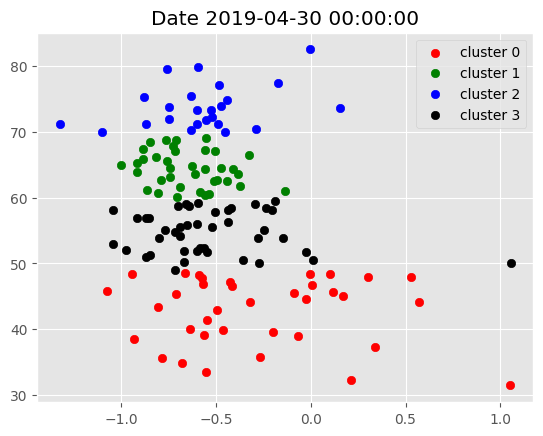

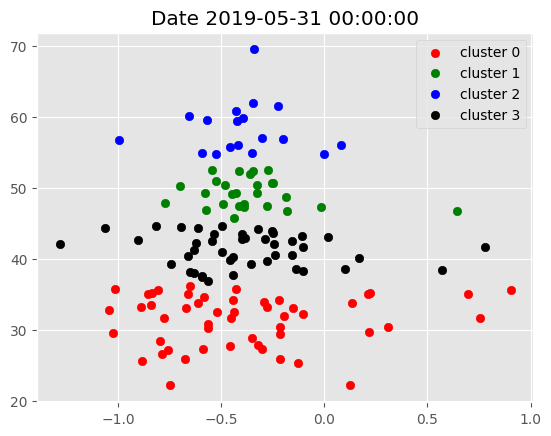

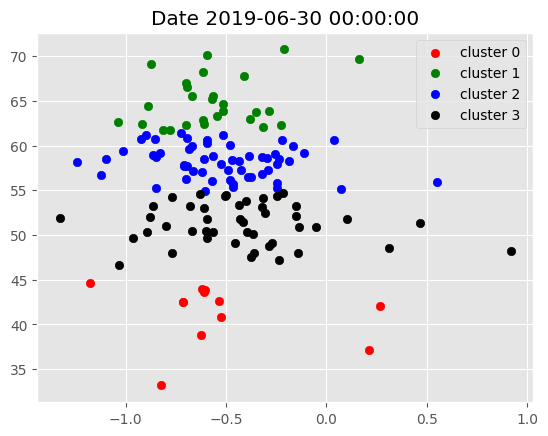

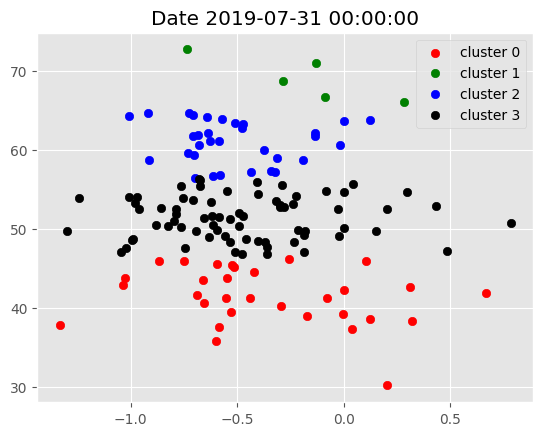

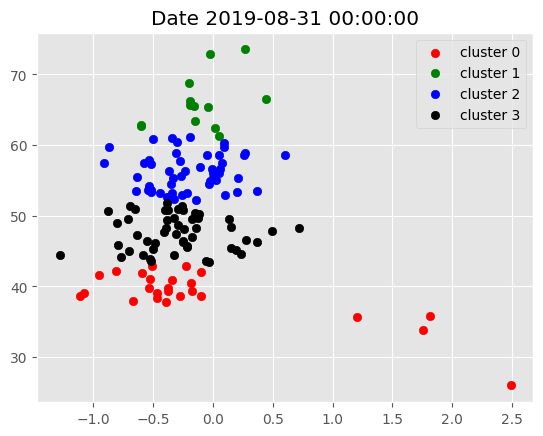

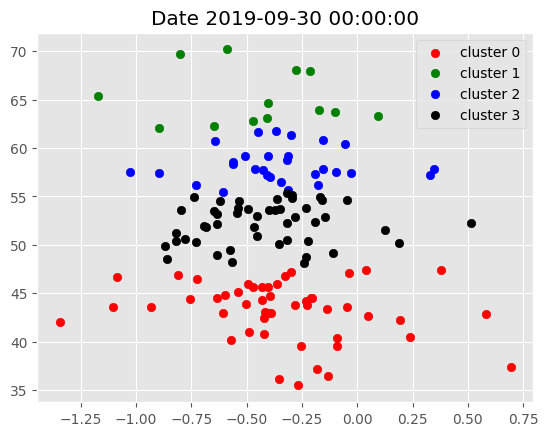

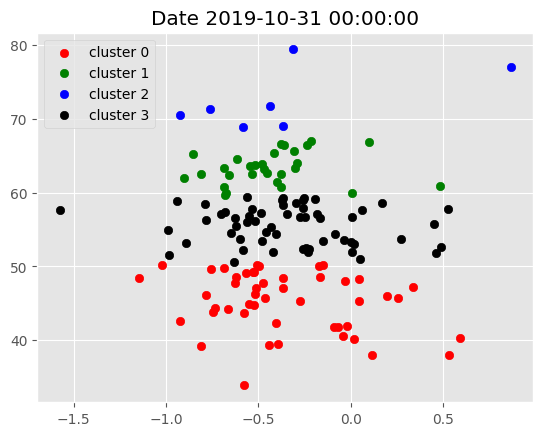

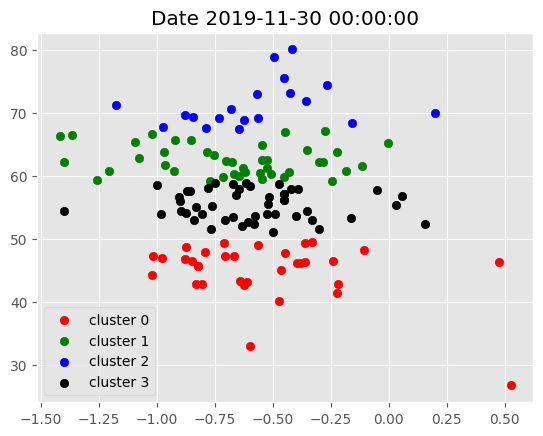

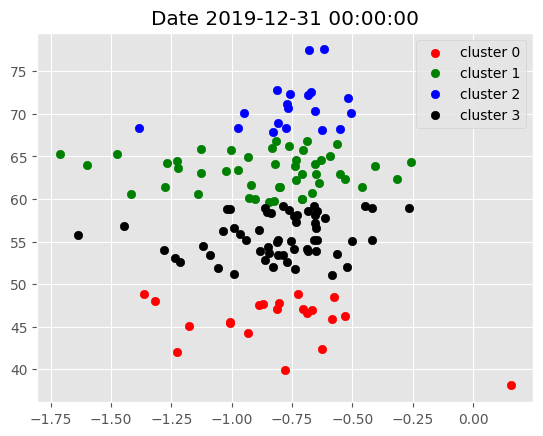

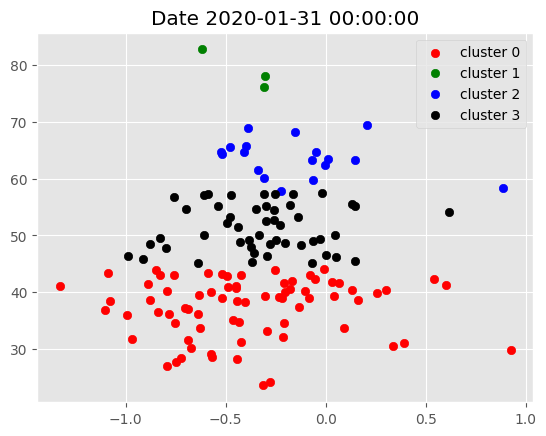

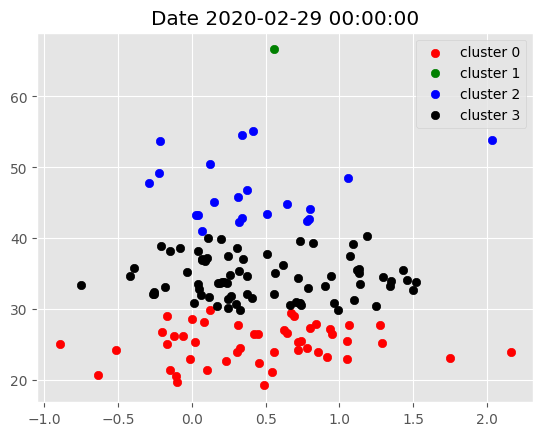

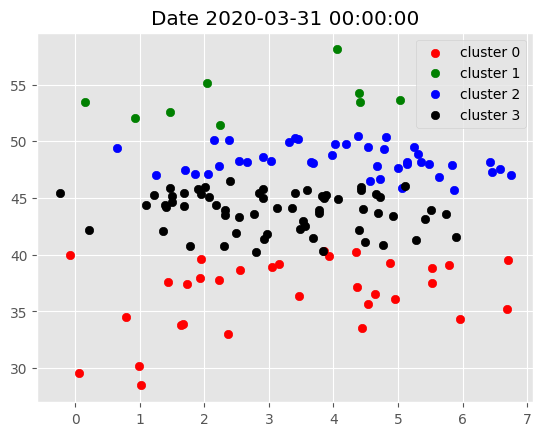

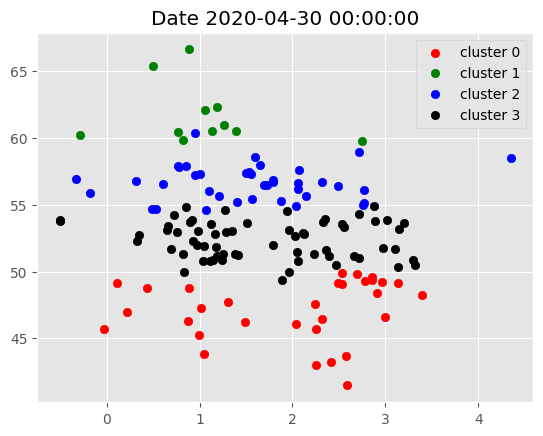

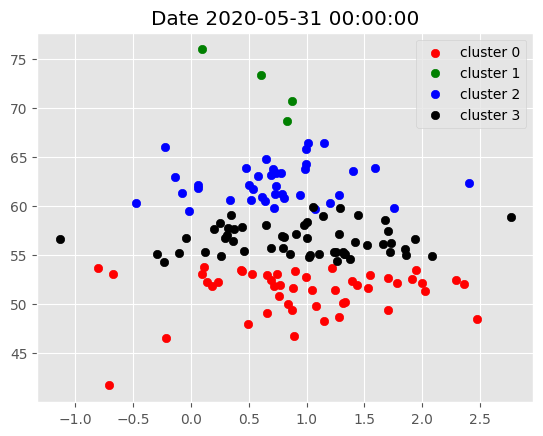

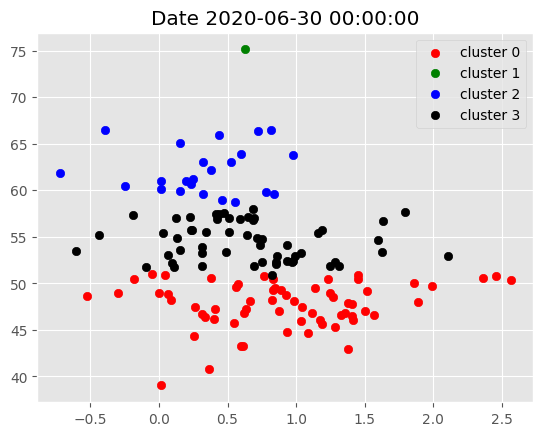

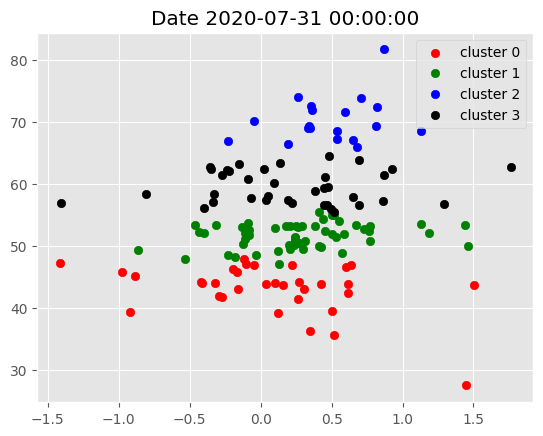

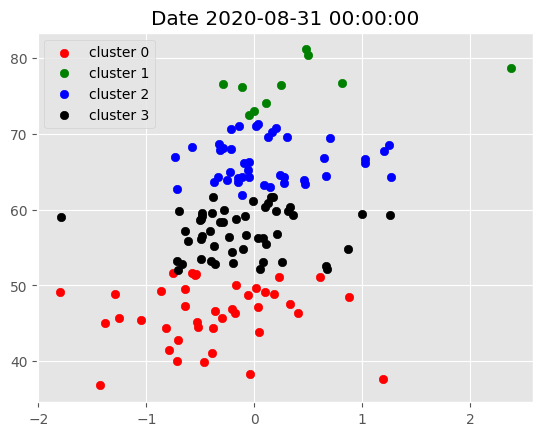

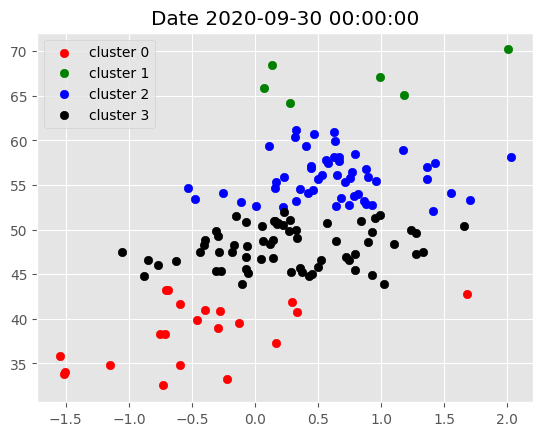

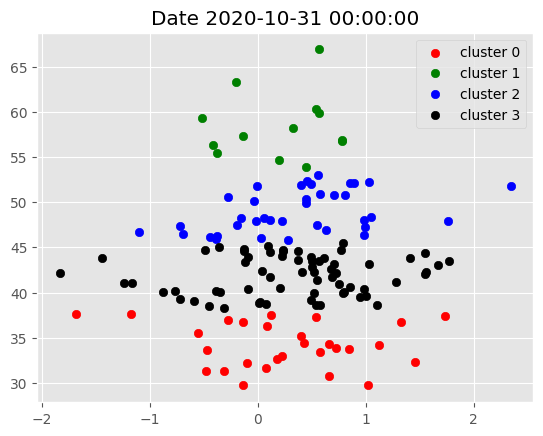

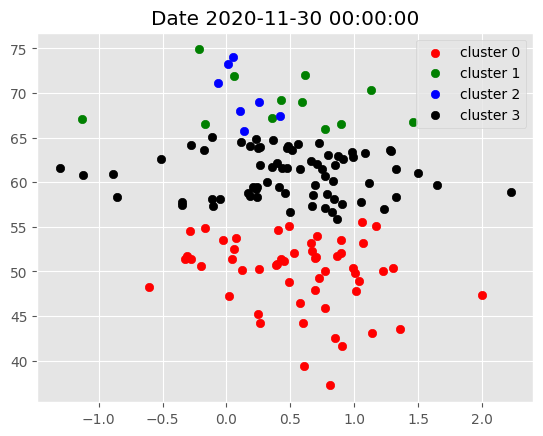

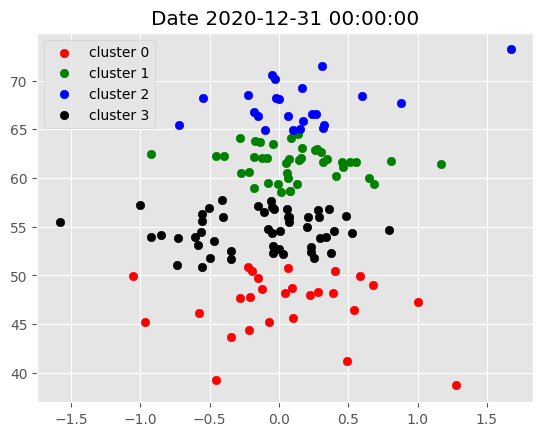

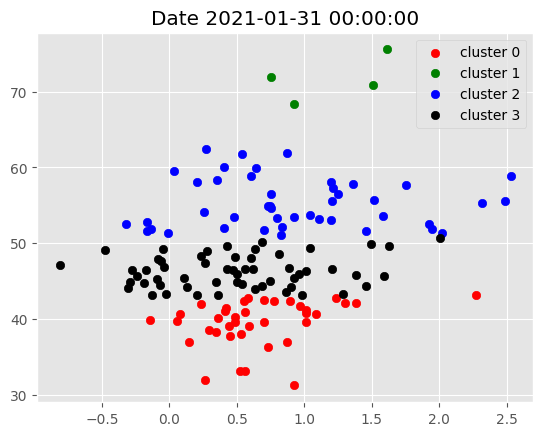

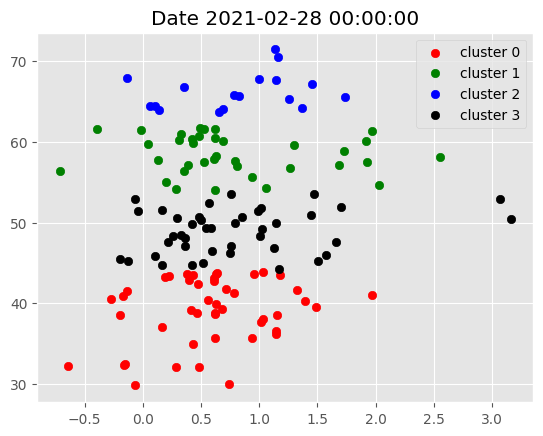

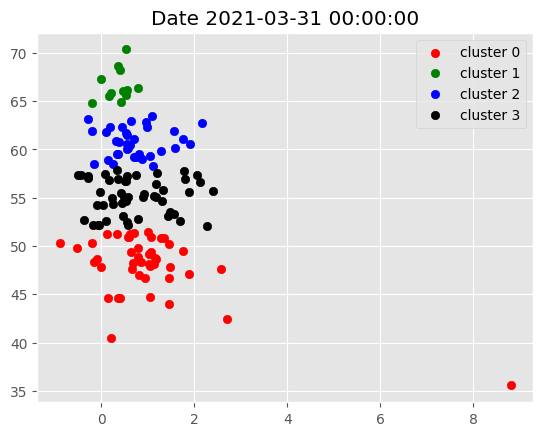

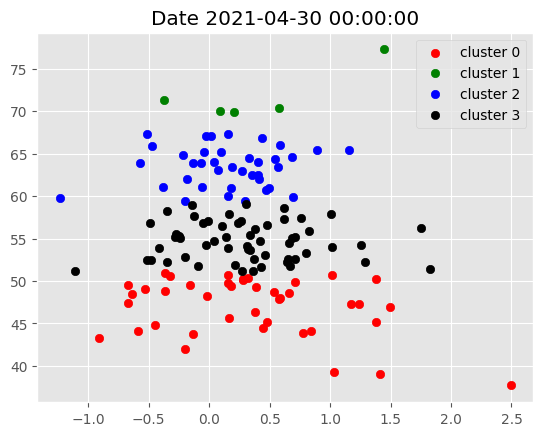

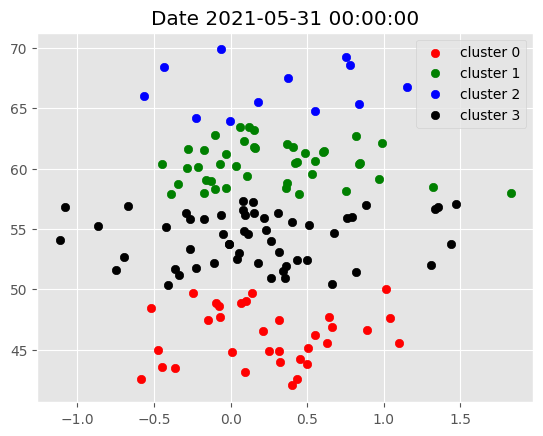

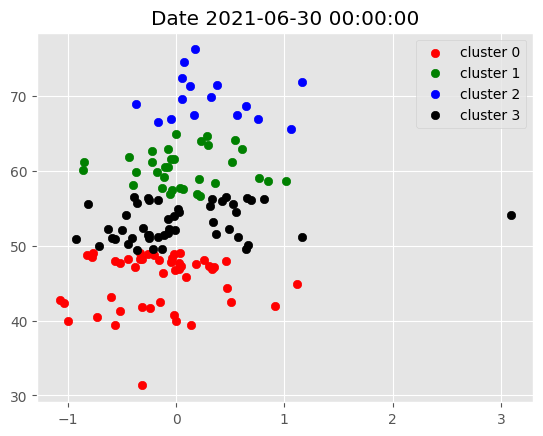

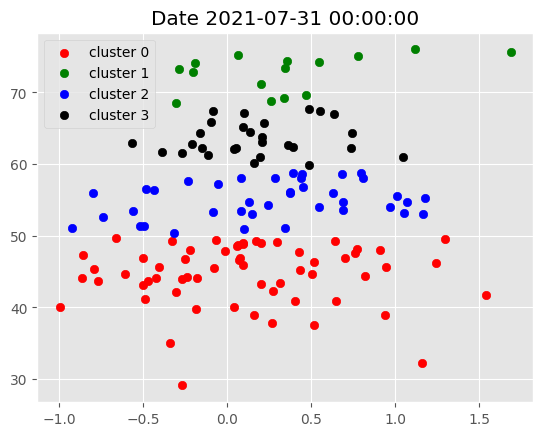

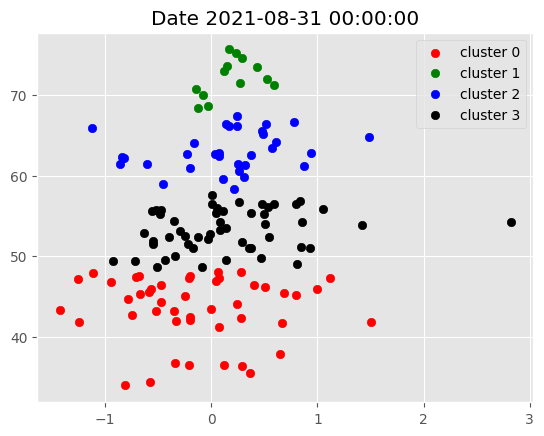

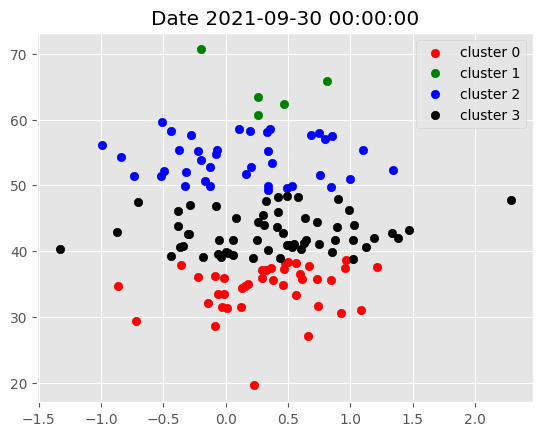

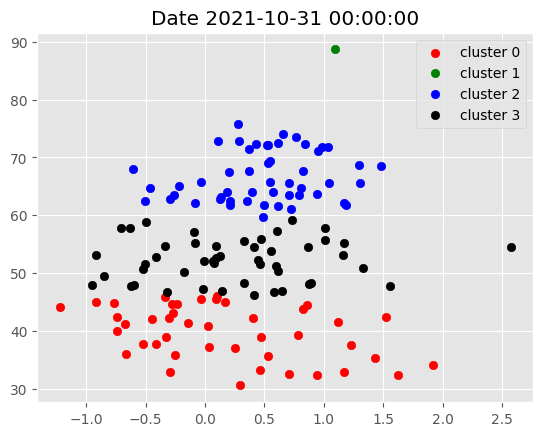

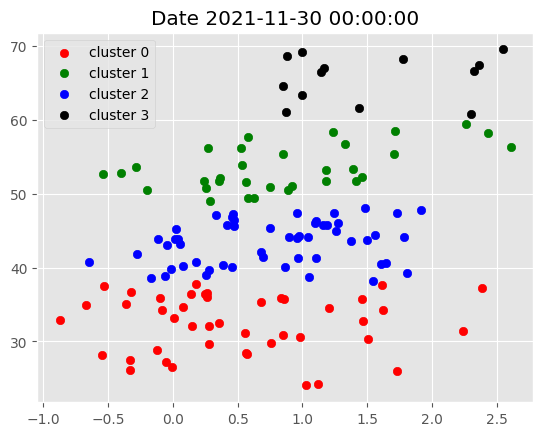

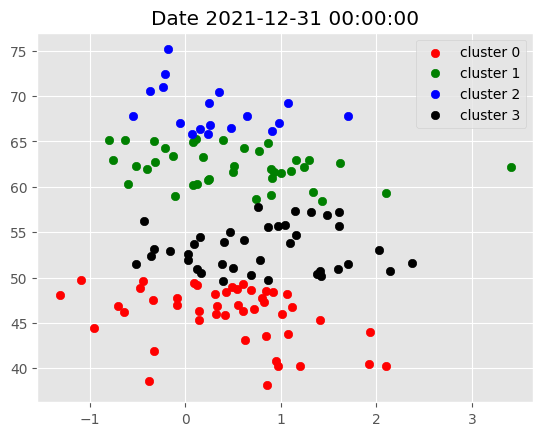

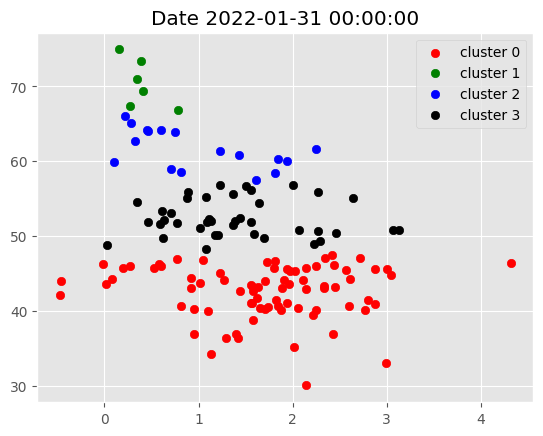

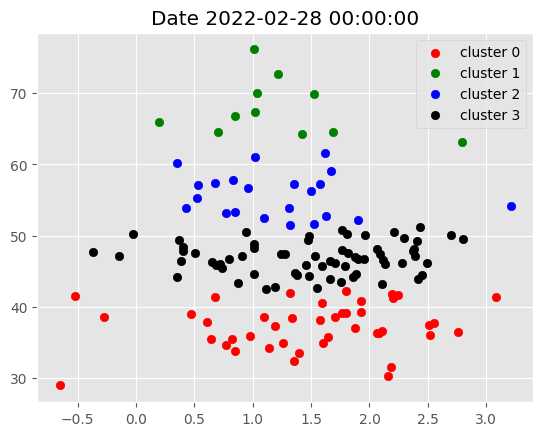

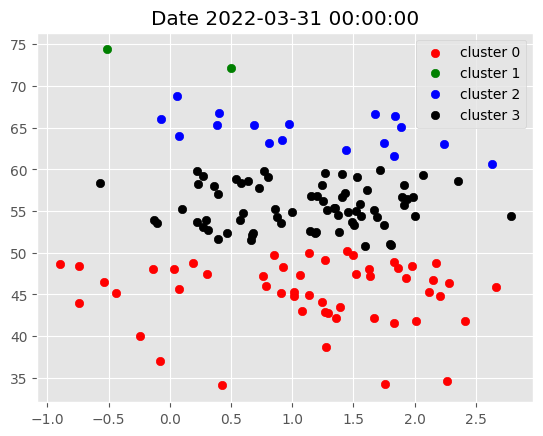

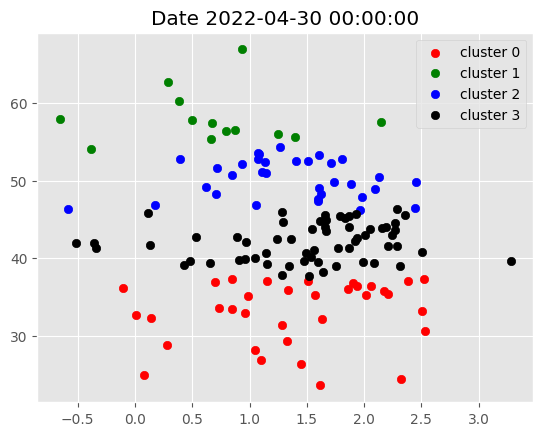

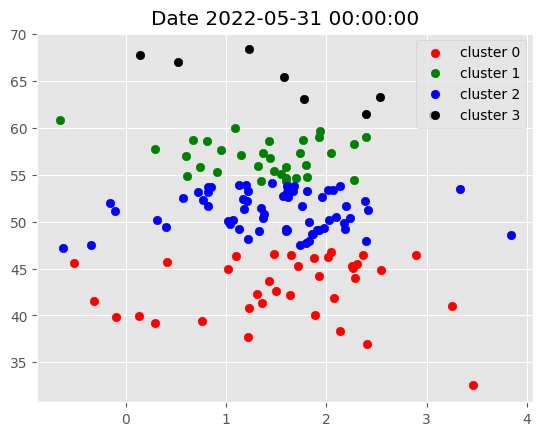

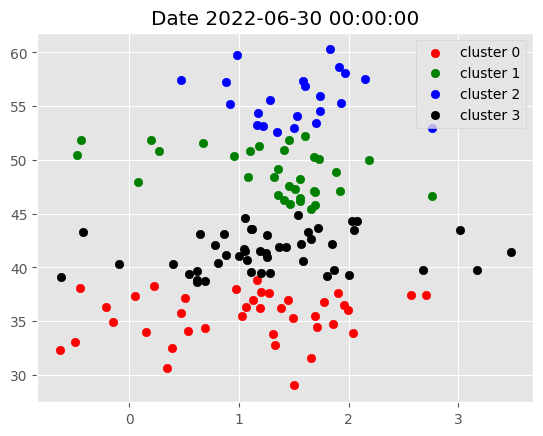

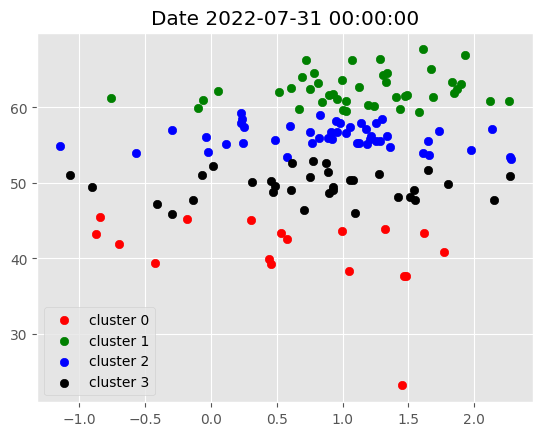

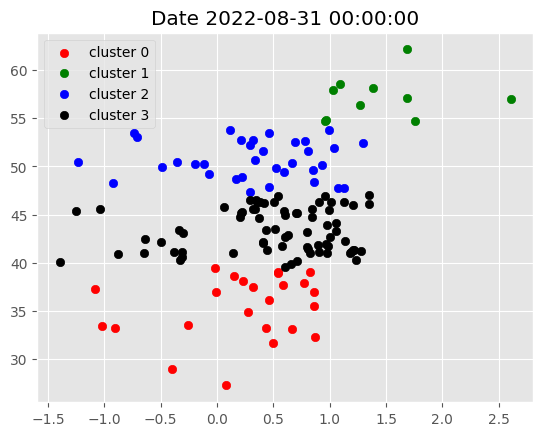

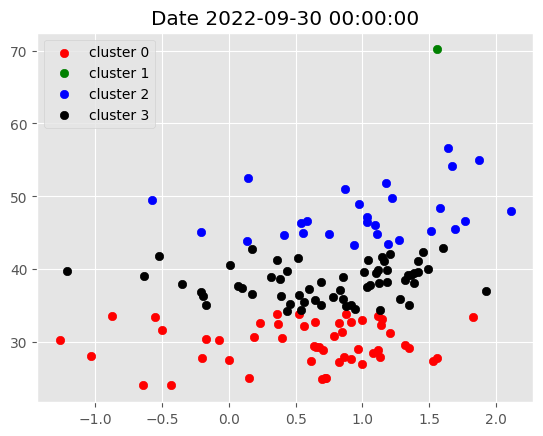

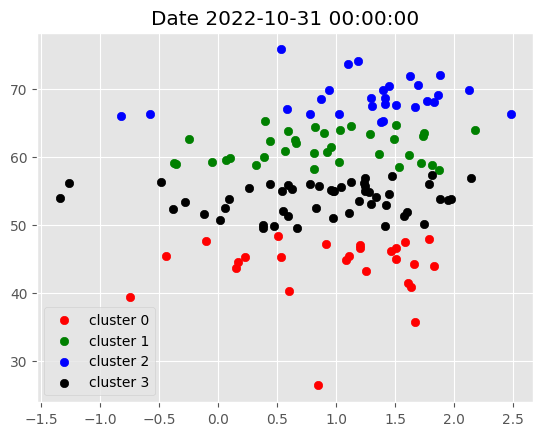

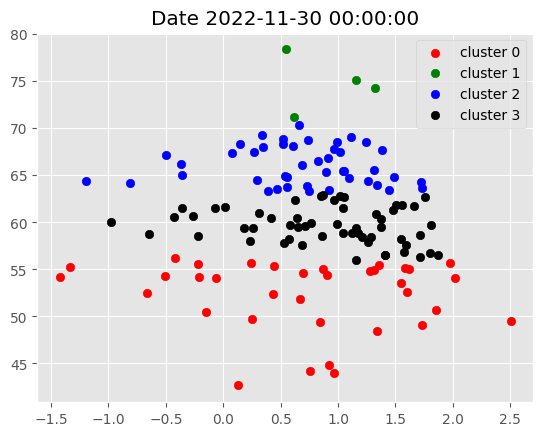

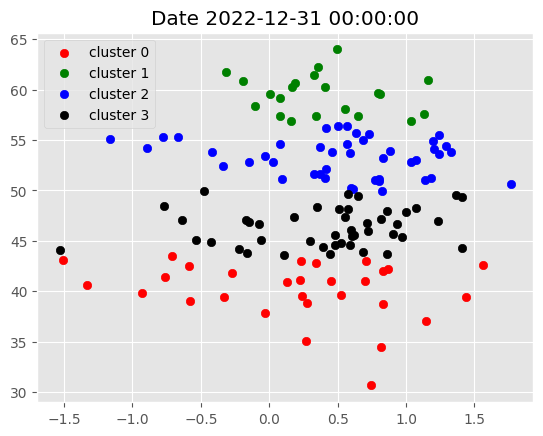

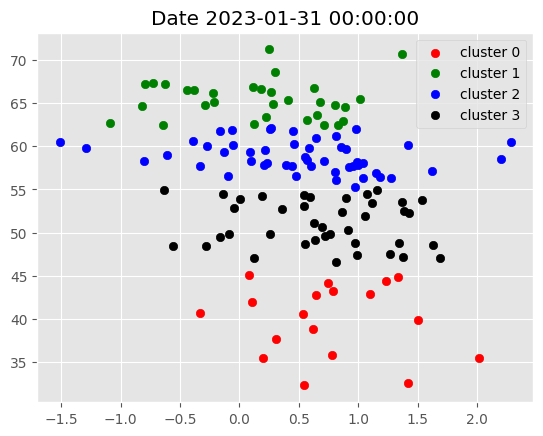

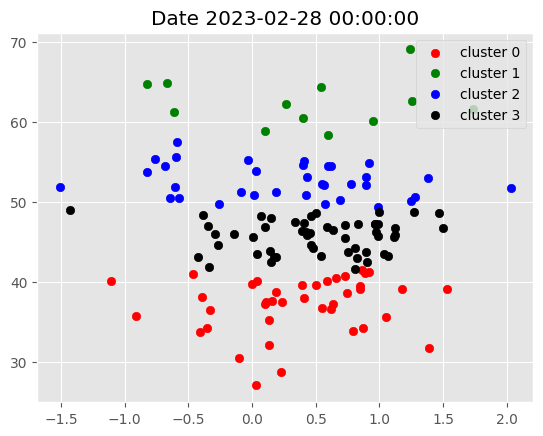

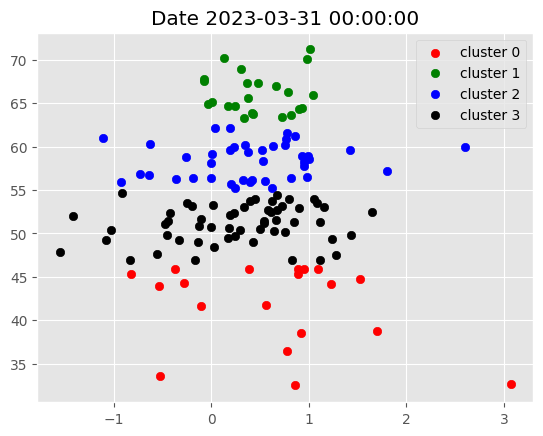

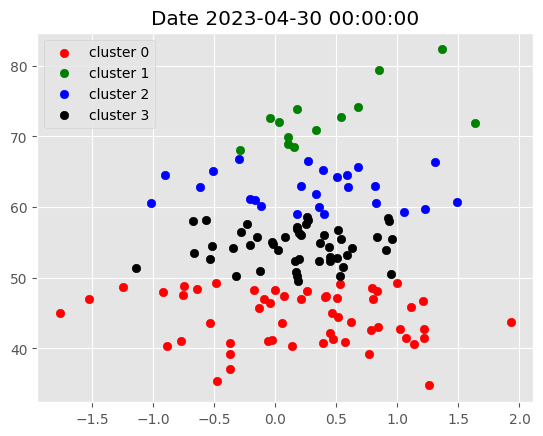

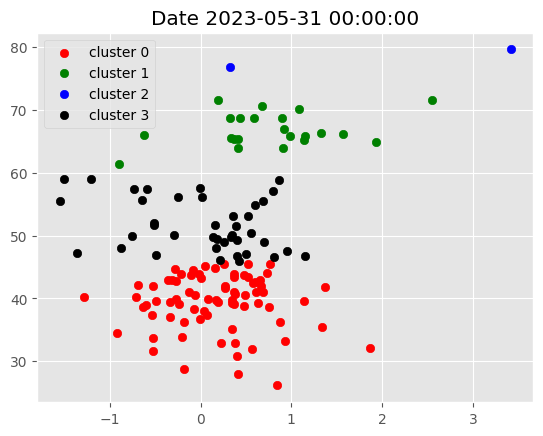

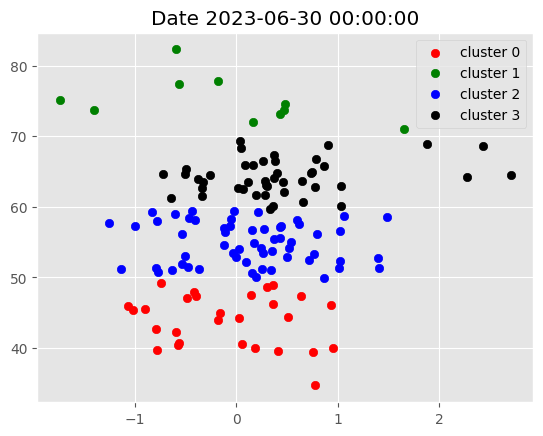

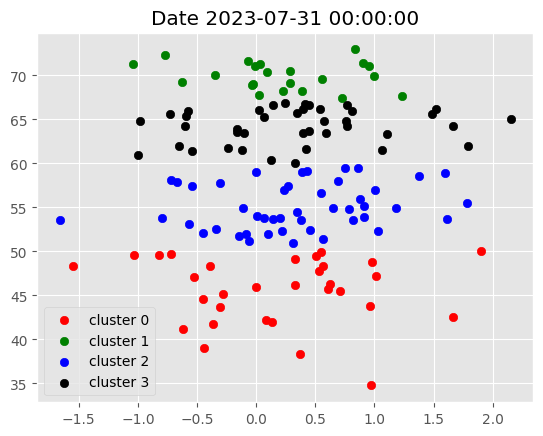

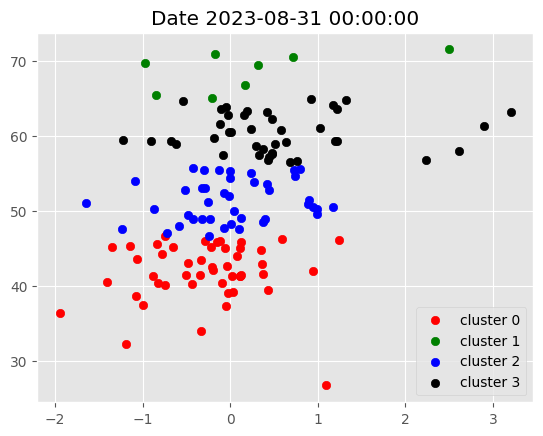

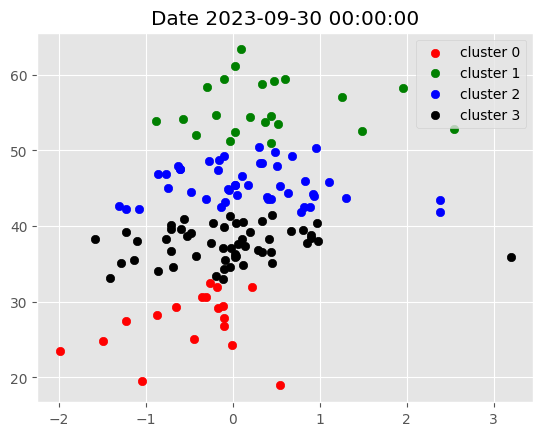

In [43]:
plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    
    g = data.xs(i, level=0)
    
    plt.title(f'Date {i}')
    
    plot_clusters(g)

### So the takeaway is that now we will have the ability to know which is the cluster of stocks which have the best momentum. which is cluster 3

# 7. For each month select assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe ratio optimization

- First we will filter only stocks corresponding to the cluster we choose based on our hypothesis.

- Momentum is persistent and my idea would be that stocks clustered around RSI 70 centroid should continue to outperform in the following month - thus I would select stocks corresponding to cluster 3.

`filtered_df = data[data['cluster']==3].copy()`
- Explanation: This line creates a new DataFrame (filtered_df) containing only the rows from the original DataFrame data where the 'cluster' column has a value of 3.
- Purpose: The goal is to filter the data to only include rows where the 'cluster' is equal to 3.

`filtered_df = filtered_df.reset_index(level=1)`
- Explanation: This line resets the index of filtered_df by moving the second level of the multi-level index ('date') to become a regular column in the DataFrame.
- Purpose: The intention is to make 'date' a regular column so that it can be manipulated more easily.

`filtered_df.index = filtered_df.index + pd.DateOffset(1)`
- Explanation: This line adds a one-day offset to the 'date' index of filtered_df.
- Purpose: The aim is to shift all dates by one day.

`filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])`
- Explanation: This line resets the index to the default integer index and then sets a new multi-level index on the columns 'date' and 'ticker'.
- Purpose: The goal is to have 'date' and 'ticker' as the new multi-level index.

`dates = filtered_df.index.get_level_values('date').unique().tolist()`
- Explanation: This line extracts unique dates from the 'date' index level of filtered_df and converts them into a list.
- Purpose: To obtain a list of unique dates present in the DataFrame.

`fixed_dates = {}
for d in dates:
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()`
- Explanation: This loop iterates over the unique dates and creates a dictionary where each key is a formatted date string ('%Y-%m-%d') and the corresponding value is a list of tickers for that date.
- Purpose: To organize the data in a dictionary format for easier access and further processing.

In [44]:
filtered_df = data[data['cluster']==3].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2017-11-01': ['ABBV',
  'ABT',
  'AZO',
  'BA',
  'BKNG',
  'BMY',
  'BRK-B',
  'C',
  'COST',
  'CSCO',
  'CVX',
  'DAL',
  'DG',
  'EA',
  'EBAY',
  'FDX',
  'GM',
  'GS',
  'HAL',
  'HON',
  'IBM',
  'ILMN',
  'JNJ',
  'KO',
  'KR',
  'LMT',
  'LOW',
  'MDLZ',
  'MDT',
  'MO',
  'MS',
  'NFLX',
  'NKE',
  'ORLY',
  'OXY',
  'PANW',
  'PXD',
  'RTX',
  'SBUX',
  'SCHW',
  'TGT',
  'TMO',
  'UNP',
  'UPS',
  'USB',
  'VZ',
  'WDC',
  'WYNN'],
 '2017-12-01': ['AAPL',
  'AMGN',
  'BIIB',
  'BMY',
  'CMCSA',
  'CMG',
  'COP',
  'CRM',
  'DD',
  'EOG',
  'GILD',
  'GM',
  'GOOG',
  'GOOGL',
  'JNJ',
  'KO',
  'LLY',
  'MA',
  'MCK',
  'MDT',
  'META',
  'NVDA',
  'ORCL',
  'PANW',
  'PG',
  'PXD',
  'PYPL',
  'STZ',
  'TGT',
  'TMO',
  'TXN',
  'ULTA',
  'V',
  'WBA'],
 '2018-01-01': ['ABBV',
  'ADBE',
  'AMZN',
  'C',
  'CHTR',
  'CMCSA',
  'CSX',
  'CVS',
  'DD',
  'DHR',
  'DIS',
  'EBAY',
  'ELV',
  'F',
  'GOOG',
  'GOOGL',
  'GS',
  'HON',
  'HUM',
  'IBM',
  'ILMN',
  'JNJ',
  'K

In [45]:
filtered_df

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2017-11-01 ABBV           -0.031904  55.247895  4.205859  4.252226  4.298592   
           ABT            -0.004755  53.844882  3.897414  3.920986  3.944558   
           AZO             0.000044  54.634881  6.365192  6.387460  6.409729   
           BA             -0.001289  55.276865  5.492360  5.510899  5.529438   
           BKNG            0.000186  52.717540  7.543141  7.561278  7.579414   
...                             ...        ...       ...       ...       ...   
2023-10-01 UNP             0.000031  34.649827  5.321407  5.363918  5.406429   
           USB            -0.000121  36.029599  3.498763  3.567592  3.636420   
           V               0.000033  34.870926  5.451666  5.495020  5.538374   
           WFC             0.000016  40.920278  3.702645  3.743015  3.783384   
           MRNA            0.000146  38.747314  4.582514  4.685332  4.788149   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2017-11-01 ABBV    0.375557  0.473815   0.022728   0.098590   0.091379   
           ABT    -1.040044  0.276132   0.021276   0.034308   0.034801   
           AZO    -0.944108 -0.097163  -0.009427   0.056195   0.029781   
           BA     -0.731956  0.236283   0.014830   0.037517   0.022923   
           BKNG   -1.044055  0.074144   0.044319   0.016037  -0.019529   
...                     ...       ...        ...        ...        ...   
2023-10-01 UNP    -0.029979 -1.404715  -0.071315  -0.057651   0.002306   
           USB    -0.421327 -1.135695  -0.096085  -0.087773  -0.000202   
           V       0.122235 -1.143151  -0.065247  -0.016217  -0.010494   
           WFC    -0.558742 -0.282325  -0.015500  -0.057917  -0.013554   
           MRNA   -0.529511 -0.376899  -0.132219  -0.086803  -0.068763   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2017-11-01 ABBV     0.056495   0.047273    0.044026  0.494521  0.362282   
           ABT      0.038672   0.031320    0.029294  0.828092 -0.199021   
           AZO     -0.026409  -0.022723   -0.017855  0.514371  0.366472   
           BA       0.059542   0.054628    0.053360  1.016883  1.267693   
           BKNG     0.005794   0.021766    0.021903  1.170926 -0.116351   
...                      ...        ...         ...       ...       ...   
2023-10-01 UNP      0.005050   0.000943    0.006321  1.089445 -0.192586   
           USB     -0.012065  -0.027381   -0.013269  0.894447  1.314257   
           V        0.003714   0.011842    0.022308  0.935281  0.076809   
           WFC      0.016712   0.000702    0.003255  1.137640  0.314482   
           MRNA    -0.071952  -0.064976   -0.015431  1.155154  0.762525   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2017-11-01 ABBV   -0.033101  0.241982  0.164918        3  
           ABT    -0.529385  0.252406  0.970211        3  
           AZO    -0.304434  1.292885  0.217768        3  
           BA      0.191933  0.221828  0.146278        3  
           BKNG    0.622138  0.338800 -0.594858        3  
...                     ...       ...       ...      ...  
2023-10-01 UNP    -0.099505 -0.166157  0.220368        3  
           USB     1.589928 -0.044784 -0.747880        3  
           V       0.223695  0.211948  0.299607        3  
           WFC     2.009073 -0.404338 -1.468839        3  
           MRNA   -1.165677  0.590306  0.993548        3  

[3566 rows x 19 columns]

## Define portfolio optimization function
- We will define a function which optimizes portfolio weights using PyPortfolioOpt package and EfficientFrontier optimizer to maximize the sharpe ratio.

- To optimize the weights of a given portfolio we would need to supply last 1 year prices to the function.

- Apply signal stock weight bounds constraint for diversification (minimum half of equaly weight and maximum 10% of portfolio)

- now we have the list of stocks we want to invest in at the beginning of each month.
- we need to assign weights to these stocks; that is what we will be doing
- so what this optimization function does is:
- we supply the prices/returns which we have already got ready in the df; which has the prices of all the stocks for one year.
- then it calculates the covariance
- and applies the efficient frontier model
- we opt for using the max_sharpe ratio and return rounded weights.
- the lower-bound part is needed to ensure a well balanced portfolio as we can customise the lower-bound figure. 

Expected Returns (`returns`):

The `expected_returns.mean_historical_return` function is used to calculate the expected returns of assets based on historical data.
Reasoning: MPT (Modern Portfolio Theory) assumes that historical returns are a reasonable estimate of future expected returns. It uses past performance to estimate the average return an investor can expect.

Covariance Matrix (`cov`):

The `risk_models.sample_cov` function estimates the covariance matrix of asset returns.
Reasoning: Covariance measures how two assets move in relation to each other. It is a crucial input for MPT, as it helps to understand the degree to which the returns of different assets move together.

EfficientFrontier (`ef`):

The `EfficientFrontier class` is instantiated with expected returns and the covariance matrix.
`weight_bounds` are set to ensure that weights are within a specified range during optimization (from lower_bound to 0.1).
The `SCS` solver is specified for optimization.
Reasoning: The Efficient Frontier represents a set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return.

Optimizing for Maximum Sharpe Ratio (`weights = ef.max_sharpe()`):

The `max_sharpe` method optimizes the portfolio for the maximum Sharpe ratio, which is a measure of risk-adjusted performance.
Reasoning: The Sharpe ratio considers both the return and the risk of an investment. Maximizing the Sharpe ratio aims to achieve the best trade-off between risk and return.

Cleaning Weights (`return ef.clean_weights()`):

The `clean_weights` method is applied to ensure that the optimized weights are sensible and sum to 1.
Reasoning: Portfolio weights should add up to 1, representing the entirety of the investment. Cleaning ensures that weights are feasible and interpretable.

In [46]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    
    returns = expected_returns.mean_historical_return(prices=prices,
                                                      frequency=252)
    
    cov = risk_models.sample_cov(prices=prices,
                                 frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')
    
    weights = ef.max_sharpe()
    
    return ef.clean_weights()

## What is the Risk Variable we use?

Ans: Points 1 and 3 very important. Reasoning behind Risk variable and Use of Effiecient Frontier Method
1. **Covariance as a Measure of Risk:**
In finance, risk is often associated with uncertainty and the variability of returns. The covariance between two assets measures how their returns move together. If two assets tend to move in the same direction (positive covariance), their returns are more correlated, and the portfolio may be riskier. Conversely, if they move in opposite directions (negative covariance), their returns may offset each other, potentially reducing overall portfolio risk.
Covariance is a key input in MPT and is used to quantify the degree to which the returns of different assets co-move.
Diversification and Risk Reduction:

2. MPT emphasizes diversification as a means of reducing portfolio risk. By holding assets with low or negative covariances, investors can potentially benefit from the fact that the returns of different assets do not perfectly align. This diversification effect can lead to a portfolio with a lower overall risk compared to individual assets.
Efficient Frontier and Risk-Return Tradeoff:

3. **The Efficient Frontier**, a fundamental concept in MPT, represents a set of optimal portfolios that offer the highest expected return for a given level of risk or the lowest risk for a given level of expected return. The risk component is typically captured through the standard deviation or volatility of the portfolio, which depends on the covariance matrix.
The optimization process aims to find the portfolio that maximizes return for a given level of risk or minimizes risk for a given level of return.
Sharpe Ratio and Risk-Adjusted Performance:

4. The Sharpe ratio, used in the optimization code, is a widely used measure of risk-adjusted performance. It considers both the expected return and the volatility (risk) of an investment. Portfolios with higher Sharpe ratios are considered more attractive because they offer better risk-adjusted returns

- Download Fresh Daily Prices Data only for short listed stocks.

- Since our optimisation starts from Nov 2017, we need to download from Nov 2016, so that the function gets its 1 year data to optimize

In [47]:
stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

new_df

[*********************100%%**********************]  154 of 154 completed


Adj Close                                                 \
                  AAL        AAPL        ABBV        ABT         ACN   
Date                                                                   
2016-10-31  39.134327   26.281521   40.620968  34.463535  103.970650   
2016-11-01  38.363213   25.806999   41.108887  34.296654  103.881203   
2016-11-02  38.276463   25.830149   41.356499  33.989258  106.090492   
2016-11-03  38.054207   25.553280   40.701077  33.708214  104.605698   
2016-11-04  38.402084   25.322945   40.810314  34.331810  104.856148   
...               ...         ...         ...        ...         ...   
2023-09-25  12.910000  175.848328  151.668274  96.467384  314.532135   
2023-09-26  12.700000  171.733749  150.942551  95.240143  308.201630   
2023-09-27  12.610000  170.205750  150.177597  94.547340  311.942413   
2023-09-28  12.920000  170.465424  149.314560  97.110695  298.437927   
2023-09-29  12.810000  170.984741  146.186066  95.853752  304.728760   

                                                                       ...  \
                  ADBE         ADP        ADSK        AIG        AMAT  ...   
Date                                                                   ...   
2016-10-31  107.510002   74.686050   72.279999  50.977703   26.700010  ...   
2016-11-01  106.870003   74.565956   70.099998  50.134972   26.534737  ...   
2016-11-02  105.889999   77.191048   68.680000  50.027561   26.250109  ...   
2016-11-03  107.169998   76.633415   67.610001  48.044632   25.956303  ...   
2016-11-04  106.199997   76.418976   69.440002  47.408440   25.910387  ...   
...                ...         ...         ...        ...         ...  ...   
2023-09-25  511.600006  238.573792  205.669998  61.795918  136.297150  ...   
2023-09-26  506.299988  235.810547  201.660004  60.930592  133.792526  ...   
2023-09-27  502.600006  241.168076  202.279999  60.681938  134.770416  ...   
2023-09-28  504.670013  241.843964  207.889999  60.950485  137.923645  ...   
2023-09-29  509.899994  239.130417  206.910004  60.274143  138.153152  ...   

              Volume                                                           \
                   V      VLO     VRTX        VZ       WBA      WDC       WFC   
Date                                                                            
2016-10-31  10024000  4969500  1928200  12459400   4662100  3363200  20115900   
2016-11-01  10881500  7816800  2458200  13229400   5130800  3821100  20020200   
2016-11-02   9170900  7317600  2580400  16488200   9783100  4216200  19566600   
2016-11-03   7563100  3855900  2371000  12605100   4586500  3192600  14982700   
2016-11-04   7588100  3729900  1902100  14410200   7023900  2705600  27391600   
...              ...      ...      ...       ...       ...      ...       ...   
2023-09-25   5921600  3241900   698100  17616900   6891000  2685900  10624000   
2023-09-26   6193200  4936800   633600  18841600   7570500  3571100  15219400   
2023-09-27   6006700  3644000   860600  22083500  10182900  2547800  11815500   
2023-09-28   4203900  3587300   578900  18772100   7291500  3282000  12454600   
2023-09-29   6044200  4302200   896800  19759400  25659100  2512000  13119100   

                                        
                WMT     WYNN       XOM  
Date                                    
2016-10-31  6389000  1341600  16663800  
2016-11-01  8838600  3722300  13050600  
2016-11-02  7645300  2542400  11226100  
2016-11-03  6803900  9050400   8836500  
2016-11-04  7262100  3223800  13877100  
...             ...      ...       ...  
2023-09-25  3486500  1387800  11316000  
2023-09-26  4811900  1454000  11805400  
2023-09-27  5237000  2050000  23976200  
2023-09-28  3872400  1290400  16808100  
2023-09-29  6279300  1326800  18810700  

[1740 rows x 924 columns]


- Calculate daily returns for each stock which could land up in our portfolio. from the freshly downloaded data

- Then loop over each month start, select the stocks for the month and calculate their weights for the next month.

- If the maximum sharpe ratio optimization fails for a given month, apply equally-weighted weights.

- Calculated each day portfolio return.

`returns_dataframe = np.log(new_df['Adj Close']).diff()`
Explanation: This line calculates the log returns of the adjusted closing prices in new_df.
Purpose: Log returns are often used in finance because they provide a better representation of continuously compounded returns.

`portfolio_df = pd.DataFrame()`
Explanation: This line initializes an empty DataFrame called portfolio_df.
Purpose: This DataFrame will be used to store the results of the portfolio strategy.

`for start_date in fixed_dates.keys():`
Explanation: This starts a loop that iterates over the unique start dates in the fixed_dates dictionary.
Purpose: The loop goes through each date to perform portfolio optimization and strategy calculation.

`try:`
Explanation: The code inside the loop is placed inside a try-except block to handle potential errors during execution.
Purpose: It allows the code to continue running even if there are issues with specific iterations.

`end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')`
Explanation: This line calculates the end date, which is the last day of the same month as the start_date.
Purpose: This is used to define the period for which returns and portfolio optimization will be calculated.

`cols = fixed_dates[start_date]`
Explanation: This line retrieves the list of tickers (stock symbols) associated with the start_date from the fixed_dates dictionary.
Purpose: These are the assets to be considered for portfolio optimization during this iteration.

`optimization_start_date = (pd.to_datetime(start_date) - pd.DateOffset(months=12)).strftime('%Y-%m-%d')
optimization_end_date = (pd.to_datetime(start_date) - pd.DateOffset(days=1)).strftime('%Y-%m-%d')`
Explanation: These lines determine the start and end dates for the historical data used in portfolio optimization, typically looking back 12 months.
Purpose: Historical data is used to estimate expected returns and the covariance matrix for the portfolio optimization.

`optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]`
Explanation: This line selects the historical stock prices for the tickers specified by cols during the optimization period.
Purpose: Historical prices are used to estimate expected returns and covariance matrix for portfolio optimization.

`        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                       lower_bound=round(1/(len(optimization_df.columns)*2), 3))
            weights = pd.DataFrame(weights, index=pd.Series(0))
            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
`
Explanation: This section attempts to optimize portfolio weights using the optimize_weights function. If it fails, it prints an error message and continues with equal weights.
Purpose: It aims to find optimal weights for the portfolio based on historical data, but it handles potential failures gracefully.

`        if success == False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                   index=optimization_df.columns.tolist(),
                                   columns=pd.Series(0)).T
`
Explanation: If the optimization fails, equal weights are assigned to each asset in the portfolio.
Purpose: This ensures that even if optimization fails, the strategy can continue with a straightforward approach.

`temp_df = returns_dataframe[start_date:end_date]`
Explanation: This line selects the log returns for the specific period defined by start_date and end_date.
Purpose: These returns will be used to calculate the portfolio strategy returns.

`        temp_df = temp_df.stack().to_frame('return').reset_index(level=0) \
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True) \
                   .reset_index().set_index(['Date', 'ticker']).unstack().stack()
`
Explanation: This section reshapes the DataFrame to combine returns and weights in a way that facilitates further calculations.
Purpose: It prepares the data for calculating the weighted returns for each asset in the portfolio.

`temp_df.index.names = ['date', 'ticker']`
Explanation: This line sets the index names for the reshaped DataFrame.
Purpose: It assigns meaningful names to the index levels.

`temp_df['weighted_return'] = temp_df['return']*temp_df['weight']`
Explanation: This line calculates the weighted return for each asset based on the log return and its weight.
Purpose: It quantifies the contribution of each asset to the overall portfolio return.

`temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')`
Explanation: This line calculates the total strategy return for each date by summing the weighted returns of all assets.
Purpose: It provides the overall return of the portfolio strategy for each date.

`portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)`
Explanation:This line concatenates the calculated strategy returns for each iteration into the `portfolio_df`.
Purpose:`portfolio_df` accumulates the results of each iteration.

`except Exception as e:
        print(e)`
Explanation: This block catches any exceptions that might occur during the loop and prints the error message.
Purpose: It helps in identifying and handling errors during the execution of the loop.

`portfolio_df = portfolio_df.drop_duplicates()`
Explanation: This line drops any duplicate rows in the resulting DataFrame.
Purpose: It ensures that the final portfolio_df only contains unique entries.

In [48]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    
    try:

        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

        cols = fixed_dates[start_date]

        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')

        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        
        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
        
        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))

            weights = pd.DataFrame(weights, index=pd.Series(0))
            
            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
        
        if success==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T
        
        temp_df = returns_dataframe[start_date:end_date]

        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True)\
                   .reset_index().set_index(['Date', 'index']).unstack().stack()

        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

Max Sharpe Optimization failed for 2022-06-01, Continuing with Equal-Weights
'return'


,Strategy Return
date,
2017-11-01,0.001786
2017-11-02,0.001072
2017-11-03,0.003225
2017-11-06,-0.000219
2017-11-07,-0.001205
...,...
2023-09-25,0.005902
2023-09-26,-0.014945
2023-09-27,0.005919


# 8. Visualize Portfolio returns and compare to SP500 returns.

In [49]:
spy = yf.download(tickers='SPY',
                  start='2015-01-01',
                  end=dt.date.today())

spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)

portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df

[*********************100%%**********************]  1 of 1 completed


,Strategy Return,SPY Buy&Hold
2017-11-01,0.001786,0.001321
2017-11-02,0.001072,0.000388
2017-11-03,0.003225,0.003333
2017-11-06,-0.000219,0.001546
2017-11-07,-0.001205,-0.000696
...,...,...
2023-09-25,0.005902,0.004196
2023-09-26,-0.014945,-0.014800
2023-09-27,0.005919,0.000399
2023-09-28,0.008834,0.005781


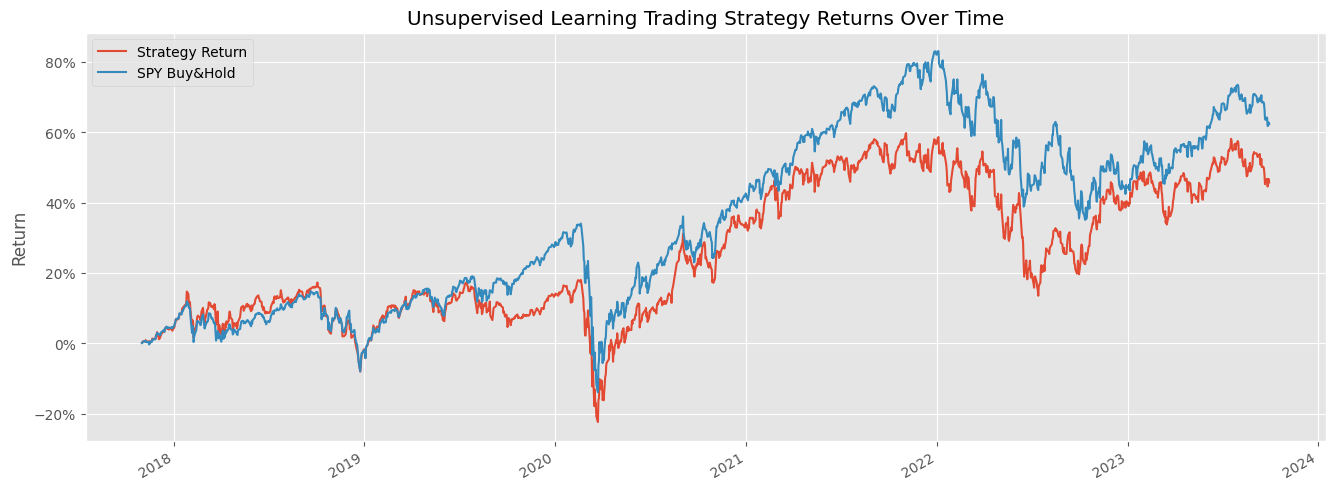

In [50]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()

## End of Base

In [79]:
filtered_df

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2017-11-01 ABBV           -0.031904  55.247895  4.205859  4.252226  4.298592   
           ABT            -0.004755  53.844882  3.897414  3.920986  3.944558   
           AZO             0.000044  54.634881  6.365192  6.387460  6.409729   
           BA             -0.001289  55.276865  5.492360  5.510899  5.529438   
           BKNG            0.000186  52.717540  7.543141  7.561278  7.579414   
...                             ...        ...       ...       ...       ...   
2023-10-01 UNP             0.000031  34.649827  5.321407  5.363918  5.406429   
           USB            -0.000121  36.029599  3.498763  3.567592  3.636420   
           V               0.000033  34.870926  5.451666  5.495020  5.538374   
           WFC             0.000016  40.920278  3.702645  3.743015  3.783384   
           MRNA            0.000146  38.747314  4.582514  4.685332  4.788149   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2017-11-01 ABBV    0.375557  0.473815   0.022728   0.098590   0.091379   
           ABT    -1.040044  0.276132   0.021276   0.034308   0.034801   
           AZO    -0.944108 -0.097163  -0.009427   0.056195   0.029781   
           BA     -0.731956  0.236283   0.014830   0.037517   0.022923   
           BKNG   -1.044055  0.074144   0.044319   0.016037  -0.019529   
...                     ...       ...        ...        ...        ...   
2023-10-01 UNP    -0.029979 -1.404715  -0.071315  -0.057651   0.002306   
           USB    -0.421327 -1.135695  -0.096085  -0.087773  -0.000202   
           V       0.122235 -1.143151  -0.065247  -0.016217  -0.010494   
           WFC    -0.558742 -0.282325  -0.015500  -0.057917  -0.013554   
           MRNA   -0.529511 -0.376899  -0.132219  -0.086803  -0.068763   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2017-11-01 ABBV     0.056495   0.047273    0.044026  0.494521  0.362282   
           ABT      0.038672   0.031320    0.029294  0.828092 -0.199021   
           AZO     -0.026409  -0.022723   -0.017855  0.514371  0.366472   
           BA       0.059542   0.054628    0.053360  1.016883  1.267693   
           BKNG     0.005794   0.021766    0.021903  1.170926 -0.116351   
...                      ...        ...         ...       ...       ...   
2023-10-01 UNP      0.005050   0.000943    0.006321  1.089445 -0.192586   
           USB     -0.012065  -0.027381   -0.013269  0.894447  1.314257   
           V        0.003714   0.011842    0.022308  0.935281  0.076809   
           WFC      0.016712   0.000702    0.003255  1.137640  0.314482   
           MRNA    -0.071952  -0.064976   -0.015431  1.155154  0.762525   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2017-11-01 ABBV   -0.033101  0.241982  0.164918        3  
           ABT    -0.529385  0.252406  0.970211        3  
           AZO    -0.304434  1.292885  0.217768        3  
           BA      0.191933  0.221828  0.146278        3  
           BKNG    0.622138  0.338800 -0.594858        3  
...                     ...       ...       ...      ...  
2023-10-01 UNP    -0.099505 -0.166157  0.220368        3  
           USB     1.589928 -0.044784 -0.747880        3  
           V       0.223695  0.211948  0.299607        3  
           WFC     2.009073 -0.404338 -1.468839        3  
           MRNA   -1.165677  0.590306  0.993548        3  

[3566 rows x 19 columns]

In [80]:
fixed_dates

{'2017-11-01': ['ABBV',
  'ABT',
  'AZO',
  'BA',
  'BKNG',
  'BMY',
  'BRK-B',
  'C',
  'COST',
  'CSCO',
  'CVX',
  'DAL',
  'DG',
  'EA',
  'EBAY',
  'FDX',
  'GM',
  'GS',
  'HAL',
  'HON',
  'IBM',
  'ILMN',
  'JNJ',
  'KO',
  'KR',
  'LMT',
  'LOW',
  'MDLZ',
  'MDT',
  'MO',
  'MS',
  'NFLX',
  'NKE',
  'ORLY',
  'OXY',
  'PANW',
  'PXD',
  'RTX',
  'SBUX',
  'SCHW',
  'TGT',
  'TMO',
  'UNP',
  'UPS',
  'USB',
  'VZ',
  'WDC',
  'WYNN'],
 '2017-12-01': ['AAPL',
  'AMGN',
  'BIIB',
  'BMY',
  'CMCSA',
  'CMG',
  'COP',
  'CRM',
  'DD',
  'EOG',
  'GILD',
  'GM',
  'GOOG',
  'GOOGL',
  'JNJ',
  'KO',
  'LLY',
  'MA',
  'MCK',
  'MDT',
  'META',
  'NVDA',
  'ORCL',
  'PANW',
  'PG',
  'PXD',
  'PYPL',
  'STZ',
  'TGT',
  'TMO',
  'TXN',
  'ULTA',
  'V',
  'WBA'],
 '2018-01-01': ['ABBV',
  'ADBE',
  'AMZN',
  'C',
  'CHTR',
  'CMCSA',
  'CSX',
  'CVS',
  'DD',
  'DHR',
  'DIS',
  'EBAY',
  'ELV',
  'F',
  'GOOG',
  'GOOGL',
  'GS',
  'HON',
  'HUM',
  'IBM',
  'ILMN',
  'JNJ',
  'K

[*********************100%%**********************]  1 of 1 completed


only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
only integers, slices (`:`), ellipsis (`...`), numpy.ne

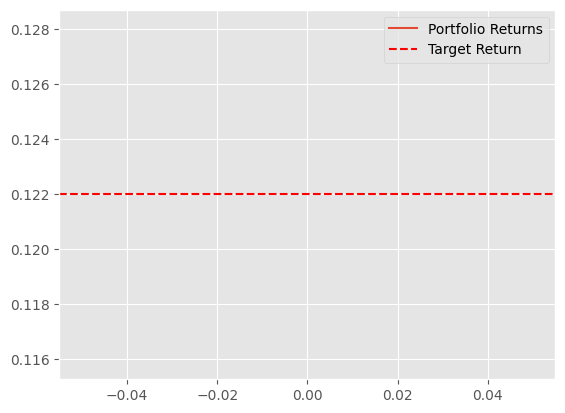

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

def optimize_weights(prices, lower_bound=0):
    returns = expected_returns.mean_historical_return(prices=prices, frequency=252)
    cov = risk_models.sample_cov(prices=prices, frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, 1),
                           solver='SCS')
    
    weights = ef.clean_weights()
    
    return weights

def calculate_buy_and_hold_return(prices):
    returns = np.log(prices['Adj Close'] / prices['Adj Close'].shift(1))
    buy_and_hold_return = returns.mean() * 252  # Assuming 252 trading days in a year
    return buy_and_hold_return

# Your existing code for data and clustering...

# Calculate buy and hold return for the S&P 500
sp500_data = yf.download(tickers='^GSPC',
                         start=data.index.get_level_values('date').unique()[0] - pd.DateOffset(months=12),
                         end=data.index.get_level_values('date').unique()[-1])
sp500_buy_and_hold_return = calculate_buy_and_hold_return(sp500_data)

# Set the target return as 20% more than the S&P 500 buy and hold return
target_return = sp500_buy_and_hold_return * 1.2

# PID Controller Parameters
kp = 0.1  # Proportional gain
ki = 0.01  # Integral gain
kd = 0.01  # Derivative gain

# Placeholder for portfolio weights
portfolio_weights = np.ones(len(data.columns)) / len(data.columns)

# Placeholder for historical portfolio returns
portfolio_returns = []

# Placeholder for PID controller variables
prev_error = 0
integral = 0

# Implement PID control
# ... (previous code remains unchanged)

# Implement PID control
for start_date in fixed_dates.keys():
    try:
        end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
        cols = fixed_dates[start_date]
        optimization_start_date = (pd.to_datetime(start_date) - pd.DateOffset(months=12)).strftime('%Y-%m-%d')
        optimization_end_date = (pd.to_datetime(start_date) - pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]

        # Calculate actual portfolio return
        actual_return = np.dot(returns_dataframe[start_date:end_date][cols].mean(), portfolio_weights[cols])
        
        # Calculate the error (difference between actual and target return)
        error = target_return - actual_return
        
        # Update PID controller variables
        integral += error
        derivative = error - prev_error
        
        # Calculate PID output
        pid_output = kp * error + ki * integral + kd * derivative
        
        # Update portfolio weights only for the selected stocks
        portfolio_weights[cols] += pid_output * optimize_weights(prices=optimization_df)
        
        # Normalize weights to ensure they sum to 1 for selected stocks
        portfolio_weights[cols] /= np.sum(portfolio_weights[cols])
        
        # Store historical portfolio returns
        portfolio_returns.append(actual_return)
        
        # Update previous error
        prev_error = error
    
    except Exception as e:
        print(e)

# ... (rest of the code remains unchanged)


# Plot the historical portfolio returns
plt.plot(portfolio_returns, label='Portfolio Returns')
plt.axhline(target_return, color='red', linestyle='--', label='Target Return')
plt.legend()
plt.show()

In [83]:
returns_dataframe

,AAL,AAPL,ABBV,ABT,ACN,ADBE,ADP,ADSK,AIG,AMAT,...,V,VLO,VRTX,VZ,WBA,WDC,WFC,WMT,WYNN,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-01,-0.019901,-0.018220,0.011940,-0.004854,-0.000861,-0.005971,-0.001609,-0.030625,-0.016670,-0.006209,...,-0.010845,0.004211,0.026280,-0.009190,-0.003269,-0.020747,-0.000435,-0.010336,0.038183,0.003953
2016-11-02,-0.002264,0.000897,0.006005,-0.009003,0.021044,-0.009212,0.034599,-0.020465,-0.002145,-0.010785,...,-0.012824,-0.017979,0.001540,-0.015223,-0.006448,-0.036290,-0.008145,0.002162,-0.017562,-0.002394
2016-11-03,-0.005824,-0.010777,-0.015975,-0.008303,-0.014094,0.012016,-0.007250,-0.015702,-0.040444,-0.011256,...,0.000869,-0.009803,-0.003982,-0.001492,-0.014136,-0.001088,0.002208,0.002588,-0.097769,0.002513
2016-11-04,0.009100,-0.009055,0.002680,0.018331,0.002391,-0.009092,-0.002802,0.026707,-0.013330,-0.001771,...,-0.003602,0.000173,0.016215,0.004470,-0.005337,-0.002179,-0.016456,-0.006773,0.005810,-0.001077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,0.000775,0.007353,0.012427,-0.006952,0.002843,-0.002538,0.002795,0.007957,0.008892,0.003080,...,-0.007344,0.008704,0.003256,-0.003612,0.010363,-0.011587,0.007972,0.004425,-0.009989,0.011161
2023-09-26,-0.016400,-0.023677,-0.004796,-0.012803,-0.020332,-0.010414,-0.011650,-0.019690,-0.014102,-0.018547,...,-0.016026,-0.034433,0.002904,-0.005140,-0.009889,-0.007875,-0.022139,-0.003502,0.000331,0.001547
2023-09-27,-0.007112,-0.008937,-0.005081,-0.007301,0.012064,-0.007335,0.022465,0.003070,-0.004089,0.007282,...,-0.000653,0.016601,-0.005817,-0.018046,-0.005219,0.006529,0.005153,-0.004812,0.016732,0.032039


In [86]:
portfolio_weights

array([0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158])

In [90]:
import pandas as pd
import numpy as np
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Function to calculate returns using log differences
def calculate_returns(df):
    return np.log(df['Adj Close']).diff()

# Function to perform portfolio optimization using PID-controlled weights
def optimize_portfolio_with_pid(prices, target_returns, lower_bound=0, pid_params=None):
    # Default PID parameters (you may need to fine-tune these)
    pid_params = pid_params or {'Kp': 0.1, 'Ki': 0.01, 'Kd': 0.01}
    
    returns = expected_returns.mean_historical_return(prices=prices, frequency=252)
    cov = risk_models.sample_cov(prices=prices, frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns, cov_matrix=cov, weight_bounds=(lower_bound, 0.1), solver='SCS')
    
    # Initialize PID parameters
    integral = 0
    previous_error = 0
    
    # Iterate over optimization cycles
    for _ in range(len(target_returns)):
        # Calculate current portfolio returns
        current_returns = np.dot(np.array(ef.weights), returns)
        
        # Calculate PID error
        error = target_returns - current_returns
        integral += error
        derivative = error - previous_error
        
        # Update weights using PID controller
        pid_adjustment = pid_params['Kp'] * error + pid_params['Ki'] * integral + pid_params['Kd'] * derivative
        ef.weights = np.clip(np.array(ef.weights) + pid_adjustment, lower_bound, 0.1)
        
        previous_error = error
    
    # Clean and return weights
    return ef.clean_weights()

# Assuming 'filtered_df', 'new_df', and 'fixed_dates' are defined as in your previous code

# Calculate returns
returns_dataframe = calculate_returns(new_df)

# Initialize DataFrame to store portfolio results
portfolio_df = pd.DataFrame()

# Set the target returns for PID controller (e.g., 20% more than SP500 buy and hold)
target_returns = 0.2 + returns_dataframe['SPY'].mean()

for start_date in fixed_dates.keys():
    try:
        end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
        cols = fixed_dates[start_date]
        
        # Extract the relevant data for optimization
        optimization_df = new_df[start_date:end_date]['Adj Close'][cols]
        
        # Optimize weights using PID controller
        weights = optimize_portfolio_with_pid(prices=optimization_df, target_returns=target_returns)
        
        # Calculate portfolio returns
        temp_df = returns_dataframe[start_date:end_date]
        temp_df['weighted_return'] = temp_df[cols].mul(weights.values).sum(axis=1)
        
        # Store results in the portfolio_df DataFrame
        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')
        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
    except Exception as e:
        print(e)

# Drop duplicate rows
portfolio_df = portfolio_df.drop_duplicates()

# Display the final portfolio_df
print(portfolio_df)

KeyError: 'SPY'